In [19]:
import pandas as pd
import numpy as np; np.random.seed(0)
from scipy import stats
import statsmodels
import statsmodels.api as sm
import seaborn as sns; sns.set()
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('classic')
%matplotlib inline

In [20]:
data = pd.read_csv('studyA.csv')
print(data.columns[17:21])
cols_1 = data.head(1)
data.drop(0, inplace=True)
print(data.columns[17:21])
cols_2 = data.head(1)
data.drop(1, inplace=True)
print(data.columns[17:21])
print (len(data))

# Numeric columns
int_columns = ['Progress', 'Duration (in seconds)']
## Boolean columns
bool_columns = ['Finished']

# Set data types
data[int_columns] = data[int_columns].astype(int)
data[bool_columns] = data[bool_columns].astype(bool)

# Filter consenting participants
data = data.dropna(subset=['consent1'])

# Filter completed records
data = data[data['Finished']==True]

# List of attention check columns
d1_1 = '4 most recent contributors'
#D2.1 = Why did you choose one contribution list over the other?
d3_1 = '7000'
d4_1 = '12000'

# Remove dollar sign and commas from amount raised
data['D3.1'] = data['D3.1'].astype(str).map(lambda x: x.replace('$',''))
data['D4.1'] = data['D4.1'].astype(str).map(lambda x: x.replace('$',''))
# data['H-Pi4'] = data['H-Pi4'].astype(str).map(lambda x: x.replace('$',''))
# data['C-Pi4'] = data['C-Pi4'].astype(str).map(lambda x: x.replace('$',''))
# data['P-Pi4'] = data['P-Pi4'].astype(str).map(lambda x: x.replace('$',''))
# data['S-Pi4'] = data['S-Pi4'].astype(str).map(lambda x: x.replace('$',''))
data['D3.1'] = data['D3.1'].astype(str).map(lambda x: x.replace(',',''))
data['D4.1'] = data['D4.1'].astype(str).map(lambda x: x.replace(',',''))
data['H-Pi3'] = data['H-Pi3'].astype(str).map(lambda x: x.replace(',',''))
data['C-Pi3'] = data['C-Pi3'].astype(str).map(lambda x: x.replace(',',''))
data['P-Pi3'] = data['P-Pi3'].astype(str).map(lambda x: x.replace(',',''))
data['S-Pi3'] = data['S-Pi3'].astype(str).map(lambda x: x.replace(',',''))

N = len(data)

Index(['S1', 'S2', 'S3', 'S4'], dtype='object')
Index(['S1', 'S2', 'S3', 'S4'], dtype='object')
Index(['S1', 'S2', 'S3', 'S4'], dtype='object')
490


In [21]:
labels = list(reversed(['A few times per year', 'At least once a month', 'At least once a week', 'Daily','Never']))
values = [data['S3'].value_counts()[label] for label in labels]
print(labels, values)


['Never', 'Daily', 'At least once a week', 'At least once a month', 'A few times per year'] [46, 45, 36, 73, 290]


In [22]:
labels = list(reversed(['Contributor', 'Project creator/ fundraiser', 'All of the above', 'Neither']))
values = [data['S4'].value_counts()[label] for label in labels]
print(labels,values)

['Neither', 'All of the above', 'Project creator/ fundraiser', 'Contributor'] [46, 65, 42, 337]


In [23]:
participant_counts = []
for pair in data['project']:
    for value in pair.replace('&','').split():
        participant_counts.append(value)
Counter(participant_counts)

Counter({'HOME': 243, 'STEM': 245, 'CADDY': 239, 'PPE': 253})

In [24]:
# Selection Comparison
attention_checks = ['H-Pi1', 'H-Pi2', 'H-Pi3', 'H-Pi4',
                    'C-Pi1', 'C-Pi2', 'C-Pi3', 'C-Pi4',
                    'P-Pi1', 'P-Pi2', 'P-Pi3', 'P-Pi4',
                    'S-Pi1', 'S-Pi2', 'S-Pi3', 'S-Pi4',]

comparison_columns = list(set(data.columns[39:119])-set(attention_checks))
# print (comparison_columns)
comparison_df = data[comparison_columns]

results_map = {"Home": {"H": 0,
                        "L": 0},
               "C":    {"H": 0,
                        "L": 0},
               "P":    {"H": 0,
                        "L": 0},
               "S":    {"H": 0,
                        "L": 0}}

interest_map = {"C":    'I1',
                "P":    'l2',
                "Home": 'l3',
                "S":    'l4'}

interest_values_map = {'Extremely interested': 3,
                       'Somewhat interested': 2,
                       'Not at all interested':1
                      } 

altruism_values_map = {'Never': 0, 
                       'Once': 1, 
                       'More than once': 2, 
                       'Often': 3, 
                       'Very often': 4}

ssi_values_map = {'Strongly disagree': 0, 
                  'Somewhat disagree': 1, 
                  'Neither agree nor disagree': 2,
                  'Somewhat agree': 3, 
                  'Strongly agree': 4}

gender_map = {'Male': 1,
              'Female':2}

age_map = {'19-29 years': 0,
           '30-49 years': 1,
           '50-64 years': 2,
           'Above 65 years': 3}

employment_map = {'Other, please specify ': 0,
                  'Student ': 1,
                  'Seeking opportunities  ': 2,
                  'Employed Part-Time': 3,
                  'Employed Full-Time ': 4,
                  'Retired ': 5}

education_map = {'Less than high school': 0,
                 'High school graduate': 1,
                 'Some college': 2,
                 'Vocational/Trade/Technical School': 3,
                 'Bachelor’s degree': 4,
                 'Advanced degree': 5}

income_map = {'Less than $15,000': 0,
              '$15,000-$29,999': 1,
              '$30,000-$49,999': 2,
              '$50,000-$74,999': 3,
              '$75,000-$99,999': 4,
              'More than $100,000': 5}

race_map = {'Other ': 0,
            'Asian': 1,
            'White': 2,
            'American Indian or Alaskan Native': 3,
            'Black or African American': 4}

condition_map = {'H':1,
                 'L':0}

category_map = {'C':0,
                'Home':1,
                'P':2,
                'S':3}

amounts_raised_map = {"C": '40000',
                      "P": '8000',
                      "H": '4000',
                      "S": '4000'}

fundraising_goal_map = {"C": '50000',
                        "P": '10000',
                        "H": '5000',
                        "S": '5000'}

treatment_map = {'HH': 2,
                 'H': 1,
                 'HL': 0,
                 'LH': 0,
                 'L': -1,
                 'LL':-2}

colors = ['red', 'purple', 'grey', 'blue', 'green']

proj_codes, proj_nums, proj_conds, sel_codes, interest = [], [], [], [], []

# Experiment variables
interest, ssi, altruism, reasons = [], [], [], []
# Demographic variables
gender, age, employment, education, income, race = [], [], [], [], [], []

In [25]:
def get_altruism_score(arr):
    return sum([altruism_values_map.get(i) for i in arr])

def get_ssi_score(arr):
    return sum([ssi_values_map.get(i) for i in arr])

In [26]:
analysis_df = pd.DataFrame()
analysis_df['ID'] = data['MTurkCode']
analysis_df['Gender'] = data['D1']
analysis_df['Age'] = data['D2']
analysis_df['Employment'] = data['D3']
analysis_df['Education'] = data['D4']
analysis_df['Income'] = data['D5']
analysis_df['Race'] = data['D7']


In [27]:
analysis_df['Gender'].value_counts(), analysis_df['Age'].value_counts()

(Male                      295
 Female                    189
 Prefer not to disclose    3  
 Non Binary                3  
 Name: Gender, dtype: int64,
 30-49 years       319
 19-29 years       103
 50-64 years       54 
 Above 65 years    14 
 Name: Age, dtype: int64)

In [28]:
reasons, alt, ints, si = [], [], [], []
# For each row in comparison dataframe
for i in range(len(comparison_df)): 
    # Identify the pair-wise combinations shown to users
    combos = list(comparison_df[i:i+1].dropna(axis=1).columns.intersection(comparison_columns))
    
    # keep track of selected project
    sel_code = ""
    
    # Experiment Variables
    ssi_ = get_ssi_score(data[i:i+1][data.columns[143:161]].values[0])
    altruism_ = get_altruism_score(data[i:i+1][data.columns[123:143]].values[0])

    # For each pair-wise combination
    for combo in combos:

        # Get project category
        category = combo[:-5]
        
        # Amount Raised
        if data[i:i+1][f"{category[0]}-Pi3"].values:
            amount_raised = data[i:i+1][f"{category[0]}-Pi3"].values[0]
        else:
            amout_raised='not_specified'
            
        # Fundraising Goal
        if data[i:i+1][f"{category[0]}-Pi4"].values:
            fundraising_goal = data[i:i+1][f"{category[0]}-Pi4"].values[0]
        else:
            fundraising_goal='not_specified'
            
        # Apply Attention Checks
        if (data[i:i+1][f"{category[0]}-Pi1"].values[0] == '4 most recent contributors' and
            amount_raised == amounts_raised_map.get(f"{category[0]}") and
            fundraising_goal == fundraising_goal_map.get(f"{category[0]}")
           ):
                    
            # Get project category
            proj_codes.append(category)
            
            # Get reasons
            reasons.append(data[i:i+1][f'{category[0]}-Pi2'].values[0])
            
            # Get user's interest in category
            interest.append(data[i:i+1][['I1', 'l2', 'l3', 'l4']].iloc[0][interest_map.get(category)])
            ssi.append(ssi_)
            altruism.append(altruism_)
            # Demographic Variables
            gender.append(data[i:i+1]['D1'].values[0])
            age.append(data[i:i+1]['D2'].values[0])
            employment.append(data[i:i+1]['D3'].values[0])
            education.append(data[i:i+1]['D4'].values[0])
            income.append(data[i:i+1]['D5'].values[0])
            race.append(data[i:i+1]['D7'].values[0])

            # Get the combination code
            codes = combo[-5:]

            # Identify the selected project
            selected = comparison_df[i:i+1][combo].values[0]

            # From the selected project
            if selected[-1] == '1': 
                # Get project number
                proj_num = codes[0]
                proj_nums.append(proj_num)
                # Get treatment condition
                condition = codes[1]
                proj_conds.append(condition)
                # Update condition
                sel_code = sel_code+condition

            elif selected[-1] == '2':
                # Get project number
                proj_num = codes[2]
                proj_nums.append(proj_num)
                # Get treatment condition
                condition = codes[3]
                proj_conds.append(condition)
                # Update condition
                sel_code = sel_code+condition

            results_map[category][condition] = results_map.get(category).get(condition) + 1
    sel_codes.append(sel_code)
        
assert len(proj_codes) == len(proj_nums) == len(proj_conds)

analysis_df['Treatment'] = sel_codes
analysis_df = analysis_df[analysis_df['Treatment']!='']
analysis_df['Treatment'].replace(treatment_map, inplace=True)

data['User_Selection'] =sel_codes
# Apply attention checks to selections
data = data[data['User_Selection']!='']
data['User_Selection'].replace(treatment_map, inplace=True)


selection_df = pd.DataFrame()
selection_df['Category'] = proj_codes 
selection_df['Gender'] = [gender_map.get(val,0) for val in gender]
selection_df['Age'] = [age_map.get(val,-1) for val in age]
selection_df['Employment'] = [employment_map.get(val,-1) for val in employment]
selection_df['Education'] = [education_map.get(val,-1) for val in education]
selection_df['Income'] = [income_map.get(val,-1) for val in income]
selection_df['Race'] = [race_map.get(val,-1) for val in race]
selection_df['Interest'] = interest
selection_df['Interest'].replace(interest_values_map, inplace=True)
selection_df['SSI'] = ssi
selection_df['Altruism'] = altruism
selection_df['Treatment'] = proj_conds 


selection_df_ = pd.DataFrame()
selection_df_['Category'] = proj_codes 
selection_df_['Gender'] = gender
selection_df_['Age'] = age
selection_df_['Employment'] = employment
selection_df_['Education'] = education
selection_df_['Income'] = income
selection_df_['Race'] = race
selection_df_['Interest'] = interest
selection_df_['Interest'].replace(interest_values_map, inplace=True)
selection_df_['SSI'] = ssi
selection_df_['Altruism'] = altruism
selection_df_['Treatment'] = proj_conds 

In [29]:
selection_df_

,Category,Gender,Age,Employment,Education,Income,Race,Interest,SSI,Altruism,Treatment
0,S,Male,30-49 years,Employed Full-Time,Bachelor’s degree,"$50,000-$74,999",White,3,4,37,L
1,Home,Male,30-49 years,Employed Full-Time,Bachelor’s degree,"$50,000-$74,999",White,2,4,37,L
2,S,Male,19-29 years,Employed Full-Time,Bachelor’s degree,"$50,000-$74,999",White,3,29,65,L
3,Home,Male,19-29 years,Employed Full-Time,Bachelor’s degree,"$50,000-$74,999",White,2,29,65,L
4,Home,Female,19-29 years,Employed Part-Time,High school graduate,"Less than $15,000",Asian,3,46,37,H
...,...,...,...,...,...,...,...,...,...,...,...
577,S,Male,19-29 years,Employed Full-Time,Bachelor’s degree,"More than $100,000",White,2,56,44,H
578,Home,Male,19-29 years,Employed Full-Time,Bachelor’s degree,"More than $100,000",White,2,56,44,L
579,Home,Male,19-29 years,Employed Full-Time,Some college,"$30,000-$49,999",White,2,42,9,H
580,Home,Female,30-49 years,Employed Part-Time,Vocational/Trade/Technical School,"$50,000-$74,999",White,2,11,25,H


In [32]:
selection_df_[['Category', 'Treatment', 'Interest']].groupby(['Category', 'Treatment']).agg('count').reset_index().rename(columns={"Interest": "Selected"})


,Category,Treatment,Selected
0,C,H,78
1,C,L,68
2,Home,H,83
3,Home,L,63
4,P,H,91
5,P,L,57
6,S,H,77
7,S,L,65


In [33]:
selection_df_[['Gender', 'Treatment', 'Interest']].groupby(['Gender', 'Treatment']).agg('count').reset_index().rename(columns={"Interest": "Selected"})


,Gender,Treatment,Selected
0,Female,H,136
1,Female,L,104
2,Male,H,187
3,Male,L,148
4,Non Binary,H,4
5,Prefer not to disclose,H,2
6,Prefer not to disclose,L,1


In [38]:
selection_df_[['Age', 'Treatment', 'Interest']].groupby(['Age', 'Treatment']).agg('count').reset_index().rename(columns={"Interest": "Selected"})


,Age,Treatment,Selected
0,19-29 years,H,68
1,19-29 years,L,63
2,30-49 years,H,209
3,30-49 years,L,152
4,50-64 years,H,48
5,50-64 years,L,29
6,Above 65 years,H,4
7,Above 65 years,L,9


In [34]:
selection_df_[['Employment', 'Treatment', 'Interest']].groupby(['Employment', 'Treatment']).agg('count').reset_index().rename(columns={"Interest": "Selected"})


,Employment,Treatment,Selected
0,Employed Full-Time,H,245
1,Employed Full-Time,L,197
2,Employed Part-Time,H,40
3,Employed Part-Time,L,19
4,"Other, please specify",H,16
5,"Other, please specify",L,18
6,Retired,H,9
7,Retired,L,7
8,Seeking opportunities,H,19
9,Seeking opportunities,L,9


In [35]:
selection_df_[['Education', 'Treatment', 'Interest']].groupby(['Education', 'Treatment']).agg('count').reset_index().rename(columns={"Interest": "Selected"})


,Education,Treatment,Selected
0,Advanced degree,H,57
1,Advanced degree,L,28
2,Bachelor’s degree,H,164
3,Bachelor’s degree,L,152
4,High school graduate,H,24
5,High school graduate,L,16
6,Some college,H,69
7,Some college,L,55
8,Vocational/Trade/Technical School,H,15
9,Vocational/Trade/Technical School,L,2


In [36]:
selection_df_[['Income', 'Treatment', 'Interest']].groupby(['Income', 'Treatment']).agg('count').reset_index().rename(columns={"Interest": "Selected"})


,Income,Treatment,Selected
0,"$15,000-$29,999",H,45
1,"$15,000-$29,999",L,20
2,"$30,000-$49,999",H,86
3,"$30,000-$49,999",L,65
4,"$50,000-$74,999",H,90
5,"$50,000-$74,999",L,67
6,"$75,000-$99,999",H,60
7,"$75,000-$99,999",L,52
8,"Less than $15,000",H,17
9,"Less than $15,000",L,12


In [37]:
selection_df_[['Race', 'Treatment', 'Interest']].groupby(['Race', 'Treatment']).agg('count').reset_index().rename(columns={"Interest": "Selected"})


,Race,Treatment,Selected
0,American Indian or Alaskan Native,H,7
1,American Indian or Alaskan Native,L,3
2,Asian,H,27
3,Asian,L,20
4,Black or African American,H,34
5,Black or African American,L,26
6,Other,H,3
7,Other,L,7
8,White,H,258
9,White,L,197


In [12]:
reasons_df = pd.DataFrame()
reasons_df['Reasons'] = reasons
reasons_df['altruism'] = altruism
reasons_df['ssi'] = ssi
reasons_df['interest'] = interest
reasons_df['interest'].replace(interest_values_map, inplace=True)
reasons_df.to_csv('StudyA_Values.csv', index=False)
len(reasons_df)

582

In [13]:
reasons_df

,Reasons,altruism,ssi,interest
0,"It had more level, steady contributions",37,4,3
1,The contributions had fewer ups and downs,37,4,2
2,Once again more moderate amounts of giving vs the other one had very large contributions or very small,65,29,3
3,Roughly same idea as before this one had more equal bids vs the other one had very large and some very small contributors.,65,29,2
4,The right side has less money from its contributor. So I would like to contribute more to help the project going,37,46,3
...,...,...,...,...
577,"I would feel more comfortable only donating a small amount to this cause, which seems more reflected in the contributors of list 2. Most recent contributions which are on the smaller end, besides one large donation. This project doesn't seem like something I would feel comfortable donating a huge amount to, so I would rather go with one that might not seem so bad to only donate a lower end amount to.",44,56,2
578,"I thought that the first list showed more people donating higher amounts which means that the project is important to people who are donating. This means that it is probably a well respected donation. I feel like the slower pace, while more stable, would make my contribution helpful. The other list seemed to have recent momentum, meaning they would be able to hit their goal without my help.",44,56,2
579,the option I chose generally had lower contributions on average,9,42,2
580,It was the most recently active,25,11,2


In [14]:
# Number of participants
print (f"Number of participants = {N}")
print (f"Passed attention checks = {len(analysis_df)}")
print (f"Number of Selections = {len(selection_df)}")

Number of participants = 490
Passed attention checks = 324
Number of Selections = 582


In [15]:
selection_df[['Category', 'Treatment']].groupby(['Treatment']).agg('count').reset_index().rename(columns={"Category": "Selected"})

,Treatment,Selected
0,H,329
1,L,253


In [14]:
selection_df[['Category', 'Treatment', 'Interest']].groupby(['Category', 'Treatment']).agg('count').reset_index().rename(columns={"Interest": "Selected"})

,Category,Treatment,Selected
0,C,H,78
1,C,L,68
2,Home,H,83
3,Home,L,63
4,P,H,91
5,P,L,57
6,S,H,77
7,S,L,65


In [16]:
selection_df[['Age', 'Treatment', 'Interest']].groupby(['Age', 'Treatment']).agg('count').reset_index().rename(columns={"Interest": "Selected"})



,Age,Treatment,Selected
0,0,H,68
1,0,L,63
2,1,H,209
3,1,L,152
4,2,H,48
5,2,L,29
6,3,H,4
7,3,L,9


In [15]:
selection_df[['Category', 'Interest', 'SSI', 'Altruism']].groupby('Category').agg(['mean', 'std'])

Interest          SSI        Altruism       
             mean   std   mean    std     mean    std
Category                                             
C        1.438    0.654 34.438 15.127 37.795   14.086
Home     2.445    0.654 33.137 13.783 38.041   12.831
P        2.365    0.682 34.892 14.373 39.034   12.606
S        2.338    0.651 32.430 15.901 38.908   12.459

In [16]:
chi = selection_df[['Category', 'Treatment']].groupby(['Treatment']).agg('count').reset_index().rename(columns={"Category": "Observed"})
chi['Expected'] = chi['Observed'].sum()/2
chi['Residual'] = chi['Observed'] - chi['Expected']
chi['(Obs-Exp)^2'] = (chi['Observed'] - chi['Expected'])**2
chi['(Obs-Exp)^2/Exp'] = (((chi['Observed'] - chi['Expected'])**2) / chi['Expected'])
chi

,Treatment,Observed,Expected,Residual,(Obs-Exp)^2,(Obs-Exp)^2/Exp
0,H,329,291.000,38.000,1444.000,4.962
1,L,253,291.000,-38.000,1444.000,4.962


## Interest in Topic

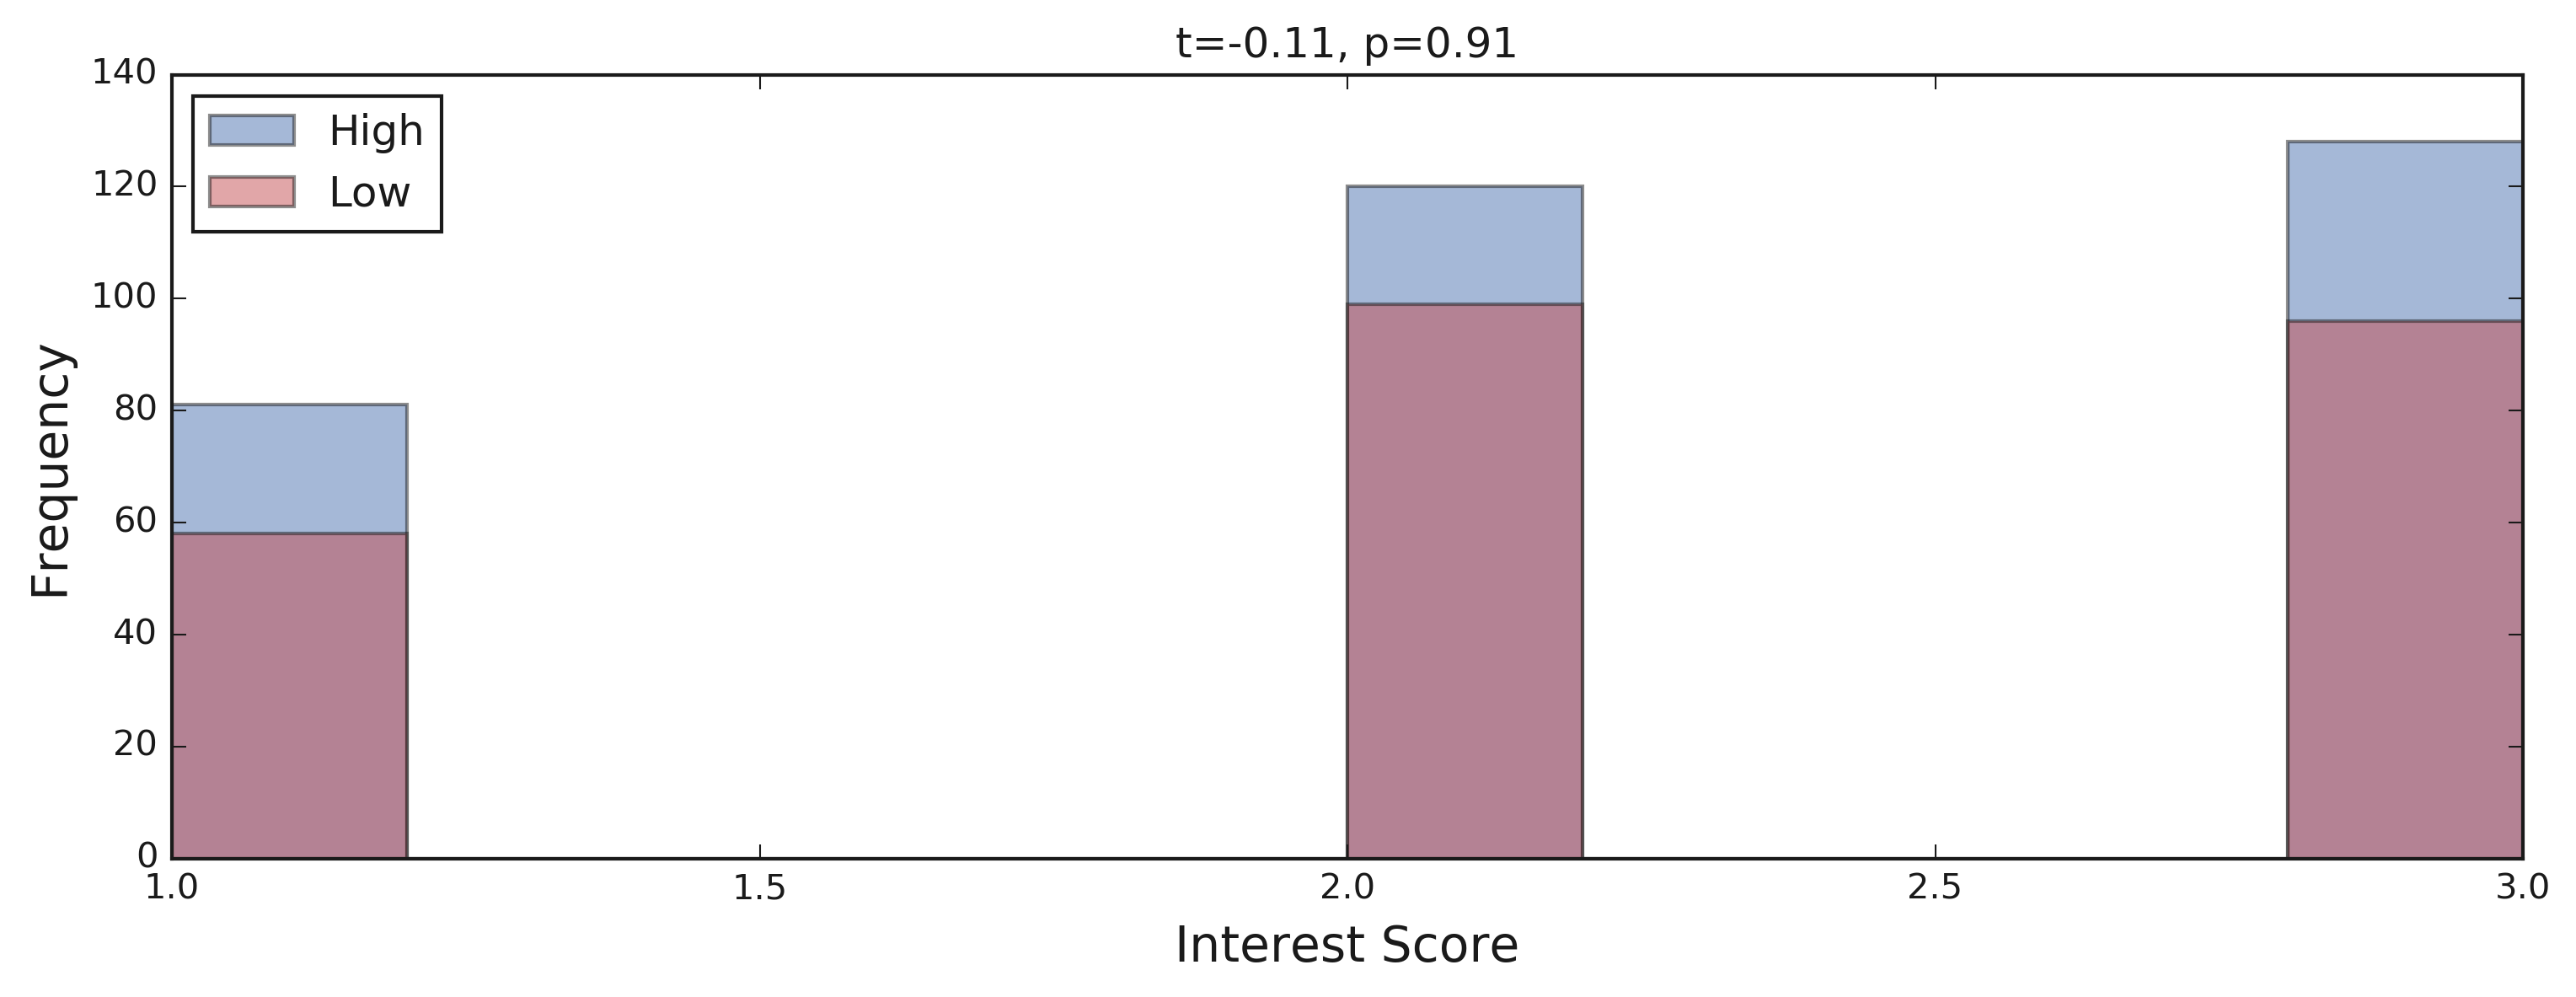

In [17]:
t, p_t = stats.ttest_ind(selection_df[selection_df['Treatment']=='H']['Interest'].values,
                        selection_df[selection_df['Treatment']=='L']['Interest'].values, 
                        equal_var = False)

fig = plt.figure(figsize=(12,4), dpi=300)
selection_df[selection_df['Treatment']=='H']['Interest'].plot(kind='hist', color='b', alpha=.5, label='High');
selection_df[selection_df['Treatment']=='L']['Interest'].plot(kind='hist', color='r', alpha=.5, label='Low');
plt.title(f"t={round(t,2)}, p={round(p_t,3)}")
plt.xlabel("Interest Score", size=14)
plt.ylabel("Frequency", size=14)
plt.legend(loc='best')
plt.show()



In [18]:
selection_df[['Treatment', 'Interest']].groupby(['Treatment']).agg('mean').reset_index().rename(columns={"Interest": "Avg Interest"})

,Treatment,Avg Interest
0,H,2.143
1,L,2.150


## Altruism

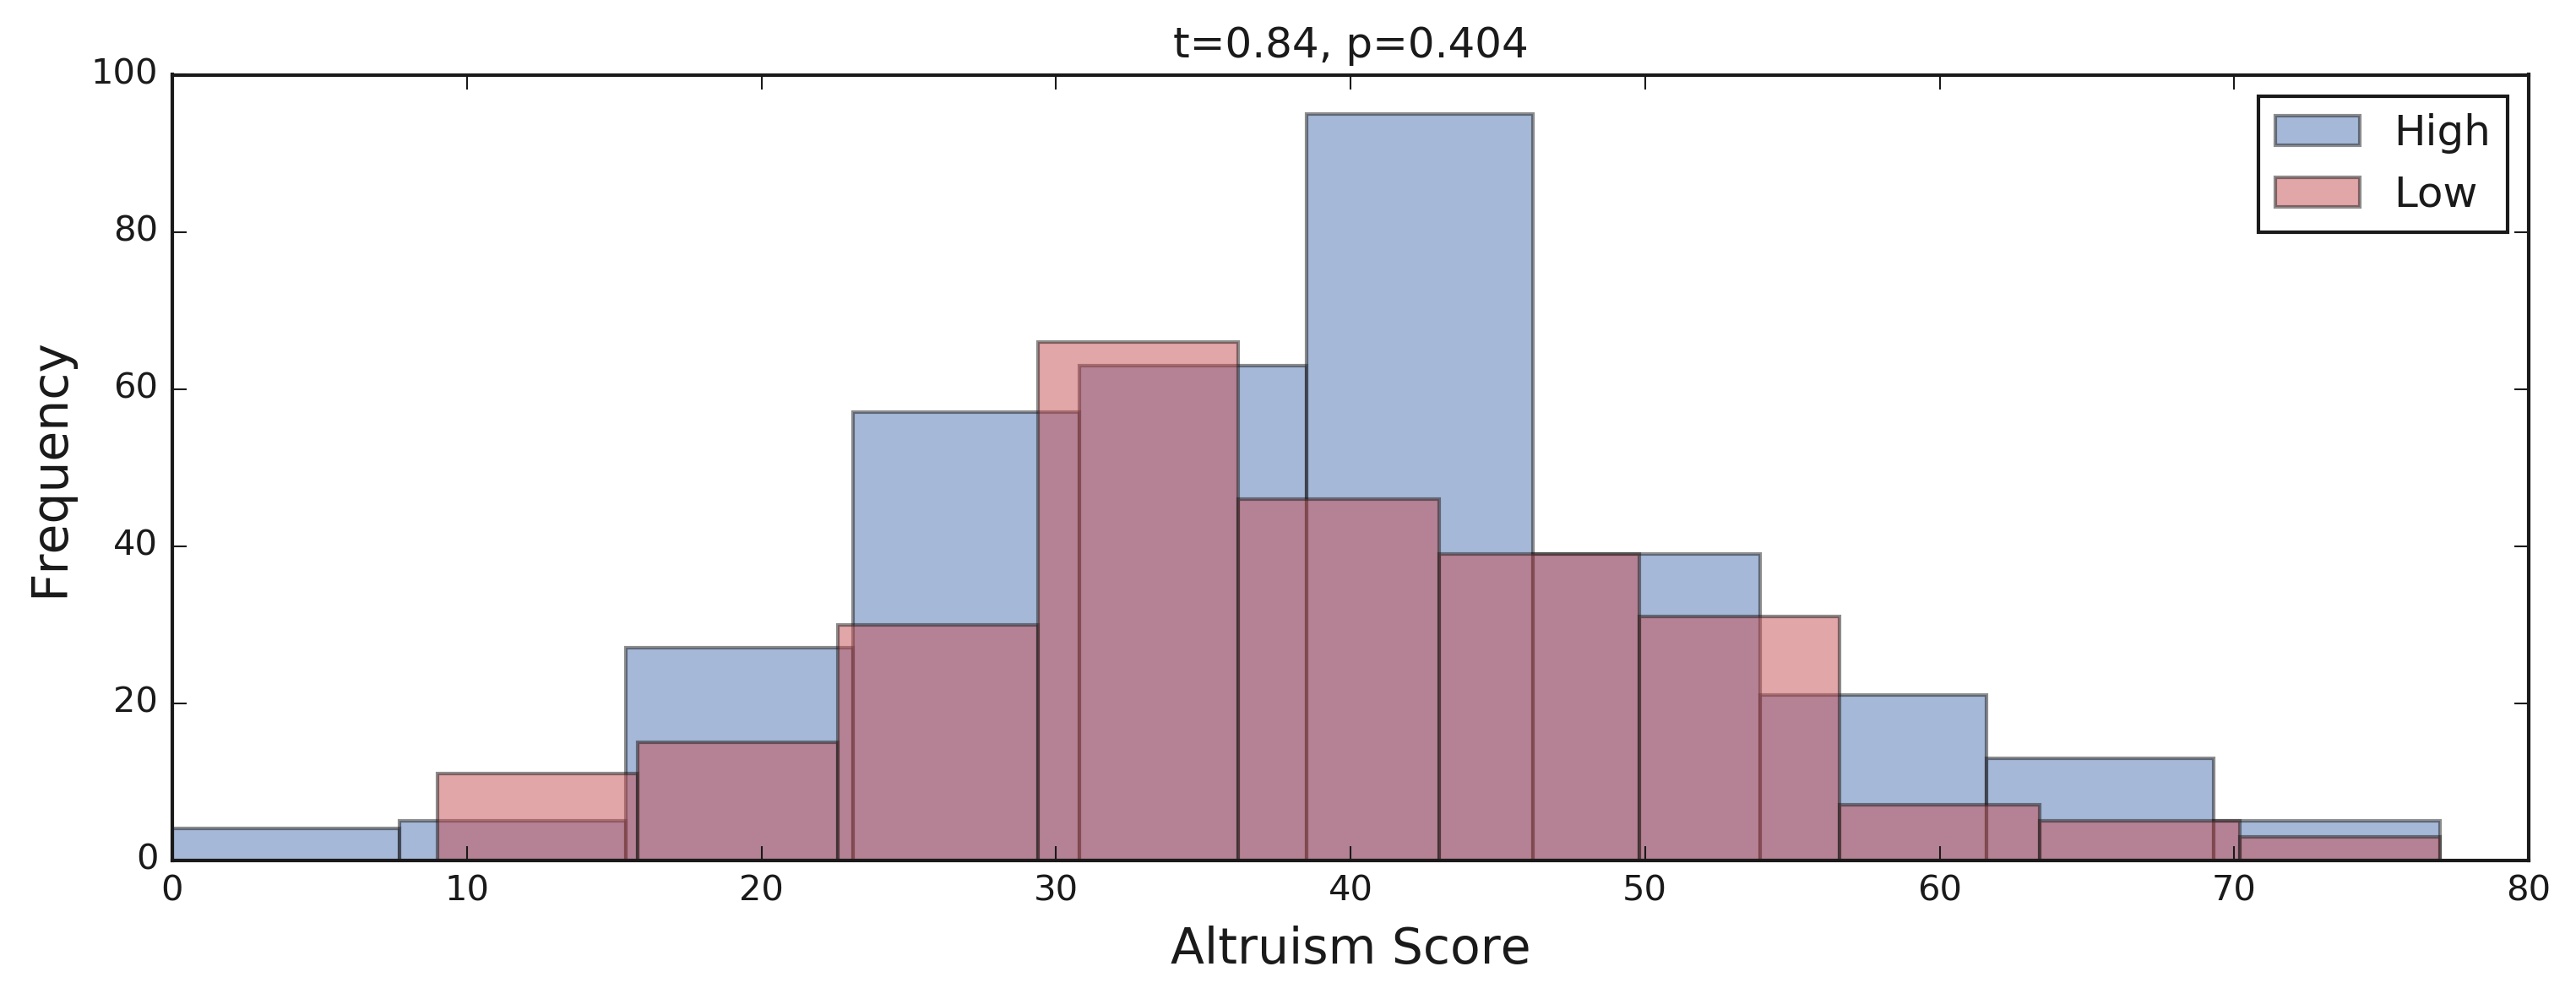

In [19]:
t, p_t = stats.ttest_ind(selection_df[selection_df['Treatment']=='H']['Altruism'].values,
                        selection_df[selection_df['Treatment']=='L']['Altruism'].values, 
                        equal_var = False)

fig = plt.figure(figsize=(12,4), dpi=300)
selection_df[selection_df['Treatment']=='H']['Altruism'].plot(kind='hist', color='b', alpha=.5, label='High');
selection_df[selection_df['Treatment']=='L']['Altruism'].plot(kind='hist', color='r', alpha=.5, label='Low');
plt.title(f"t={round(t,2)}, p={round(p_t,3)}")
plt.xlabel("Altruism Score", size=14)
plt.ylabel("Frequency", size=14)
# plt.yscale('log')
plt.legend(loc='best')
plt.show()

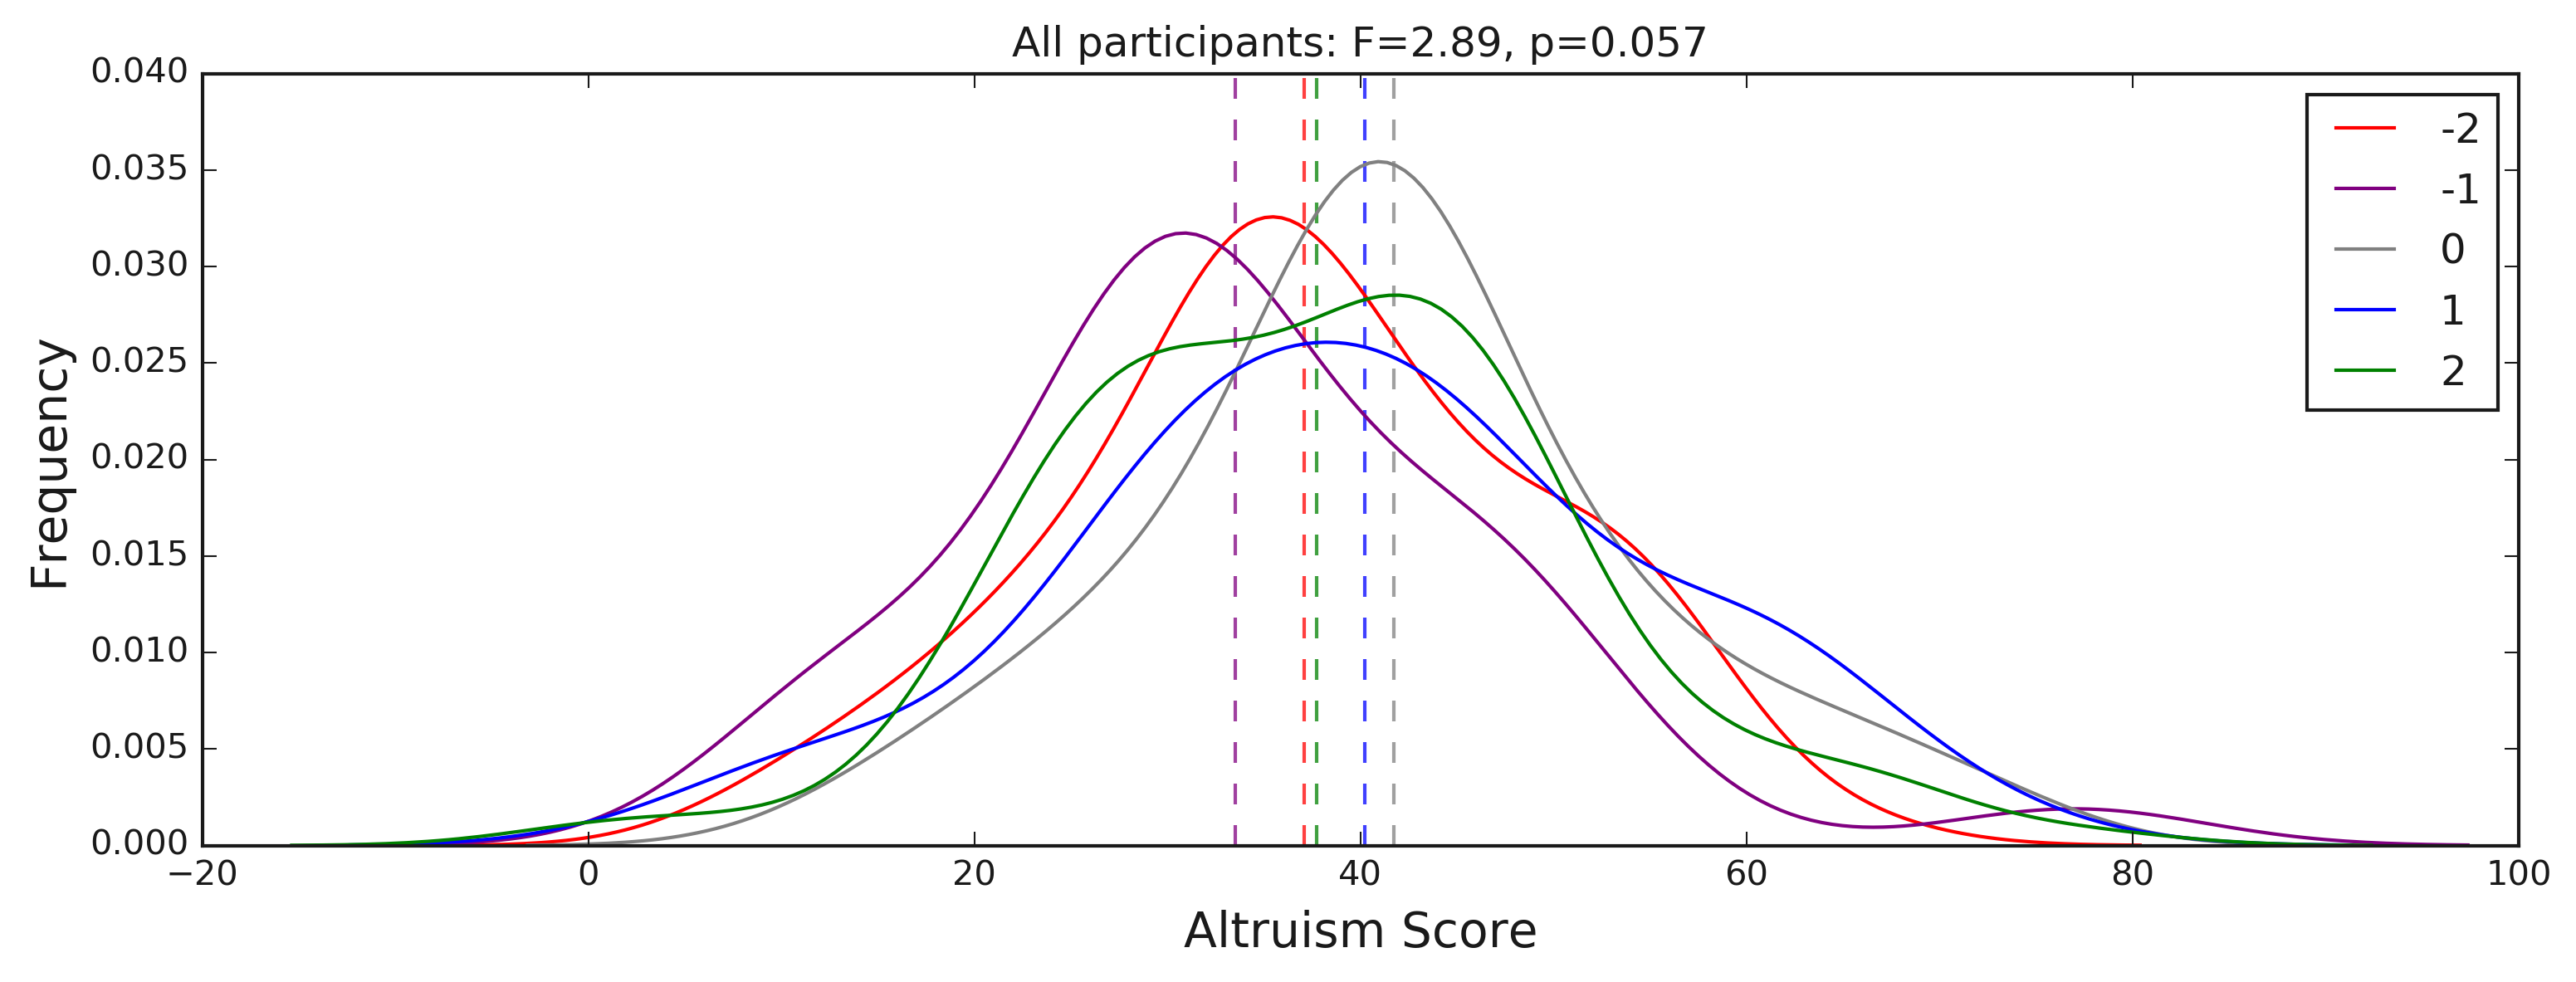

In [20]:
# Altruism Score
var = 'Al_Score'
altruism_columns = data.columns[123:143]
altruism_df = data[altruism_columns]

altruism_values = set(np.concatenate(data[altruism_columns].values))
altruism_values_map = {'Never': 0, 'Once': 1, 'More than once': 2, 'Often': 3, 'Very often': 4}
altruism_df.replace(altruism_values_map, inplace=True)

ov_alt = altruism_df.sum(axis=1)
altruism_df[var] = ov_alt
analysis_df[var] = ov_alt
data[var] = ov_alt

F, p_a = stats.f_oneway(analysis_df[(analysis_df.Treatment==-2)][var].values,
#                       analysis_df[(analysis_df.Treatment==-1)][var].values,
                      analysis_df[(analysis_df.Treatment==0)][var].values,
#                       analysis_df[(analysis_df.Treatment==1)][var].values,
                      analysis_df[(analysis_df.Treatment==2)][var].values)

fig = plt.figure(figsize=(12,4), dpi=300)
for idx, i in enumerate(np.arange(-2,3)):
#     print (i, stats.shapiro(analysis_df[(analysis_df.Treatment==i)][var])) # Test for normality
    sns.kdeplot(analysis_df[analysis_df['Treatment']==i][var], color=colors[idx], label=i);
    plt.vlines(analysis_df[analysis_df['Treatment']==i][var].mean(),0,.04, color=colors[idx], alpha=.75, linestyle='--')
plt.xlabel("Altruism Score", size=14)
plt.ylabel("Frequency", size=14)
plt.title(f"All participants: F={round(F,2)}, p={round(p_a,3)}")
plt.legend();

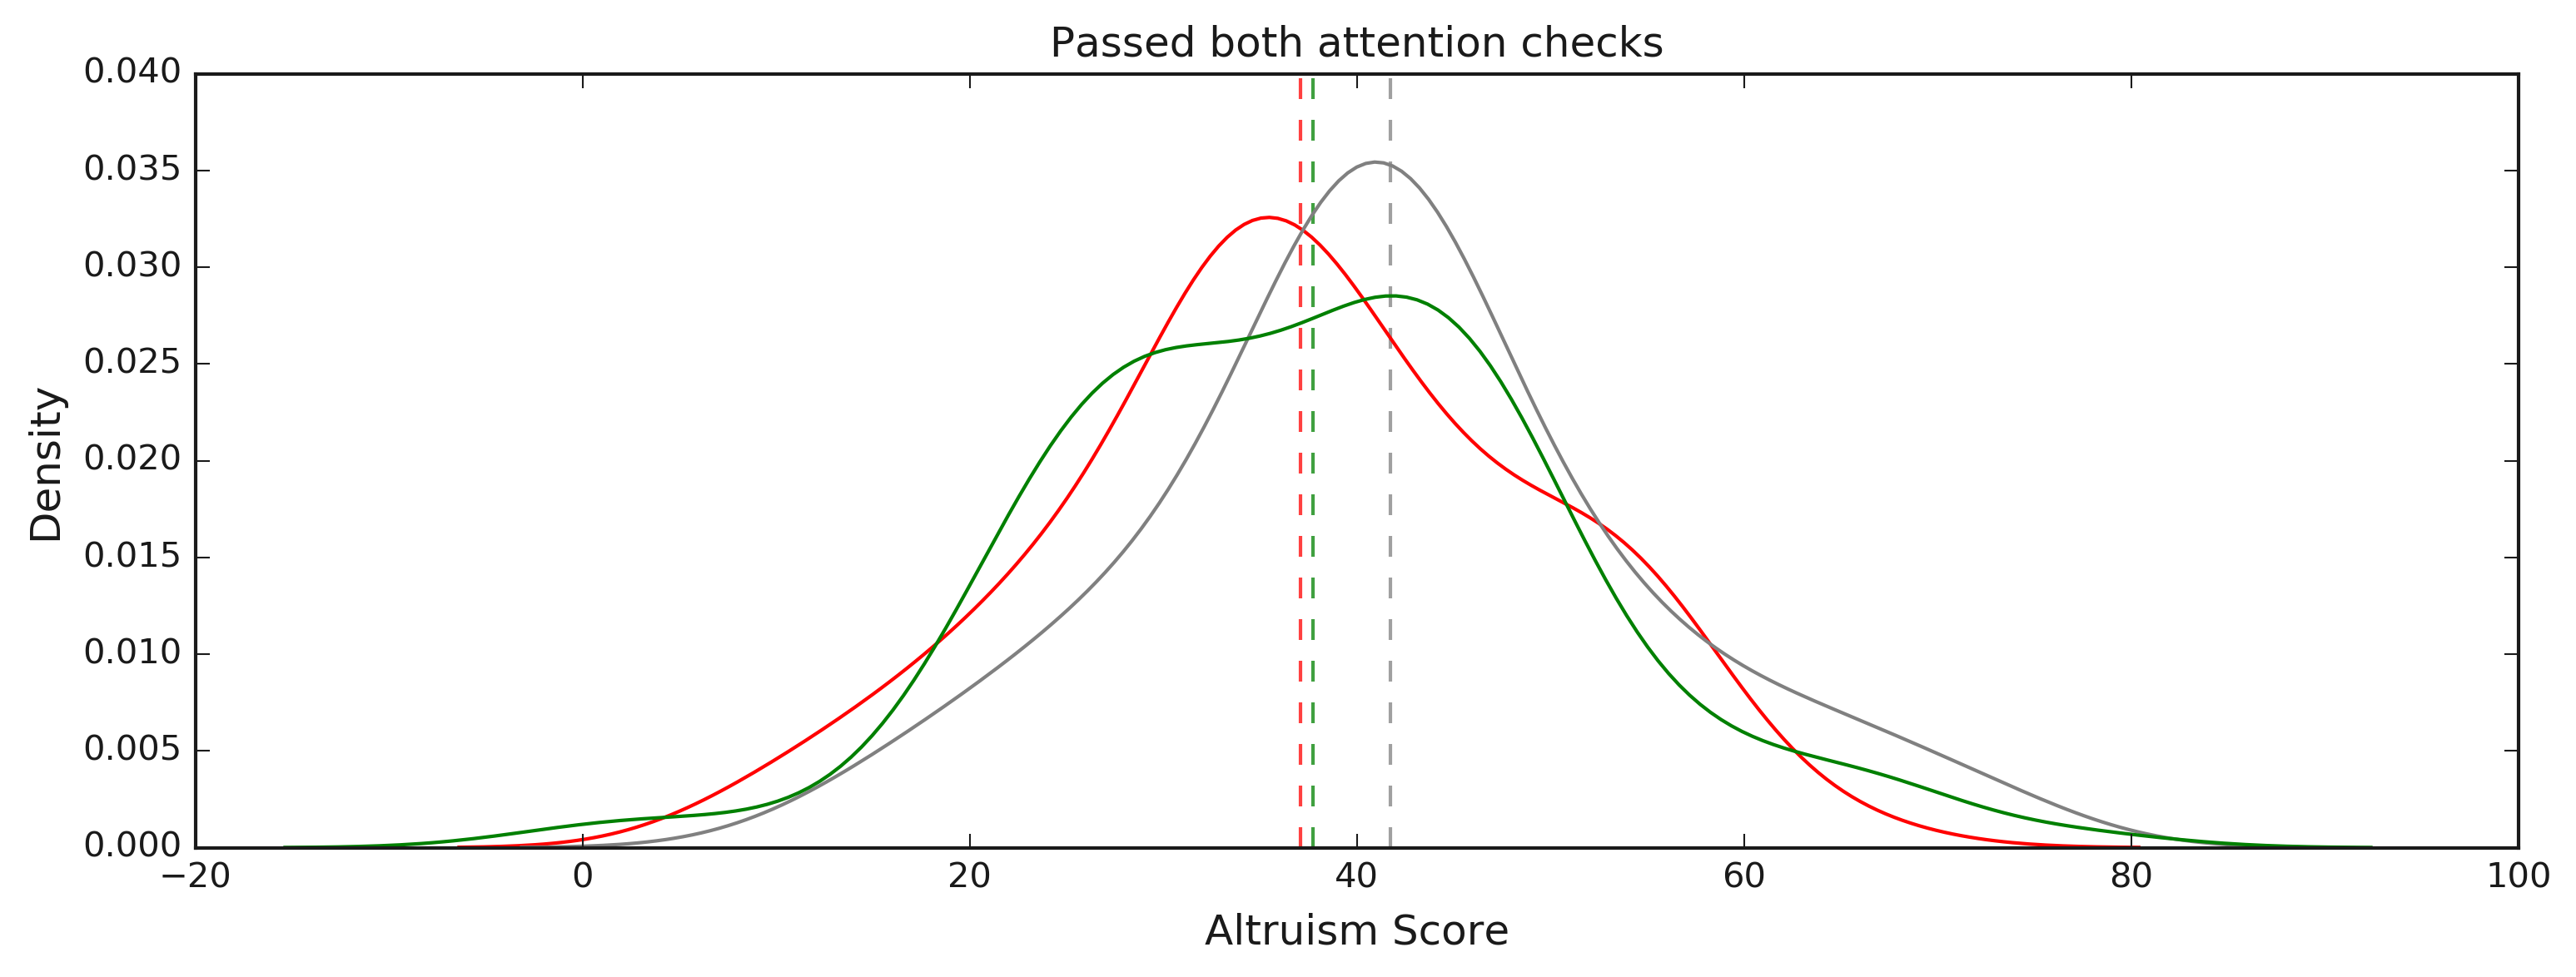

In [21]:
fig = plt.figure(figsize=(12,4), dpi=300)
for idx, i in enumerate(np.arange(-2,3)):
    if i in [-2,0,2]:
        sns.kdeplot(analysis_df[analysis_df['Treatment']==i][var], color=colors[idx], label=i);
        plt.vlines(analysis_df[analysis_df['Treatment']==i][var].mean(),0,.04, color=colors[idx], alpha=.75, linestyle='--');
plt.title("Passed both attention checks")
plt.xlabel("Altruism Score", size=12)
plt.ylabel("Density", size=12)
plt.show()

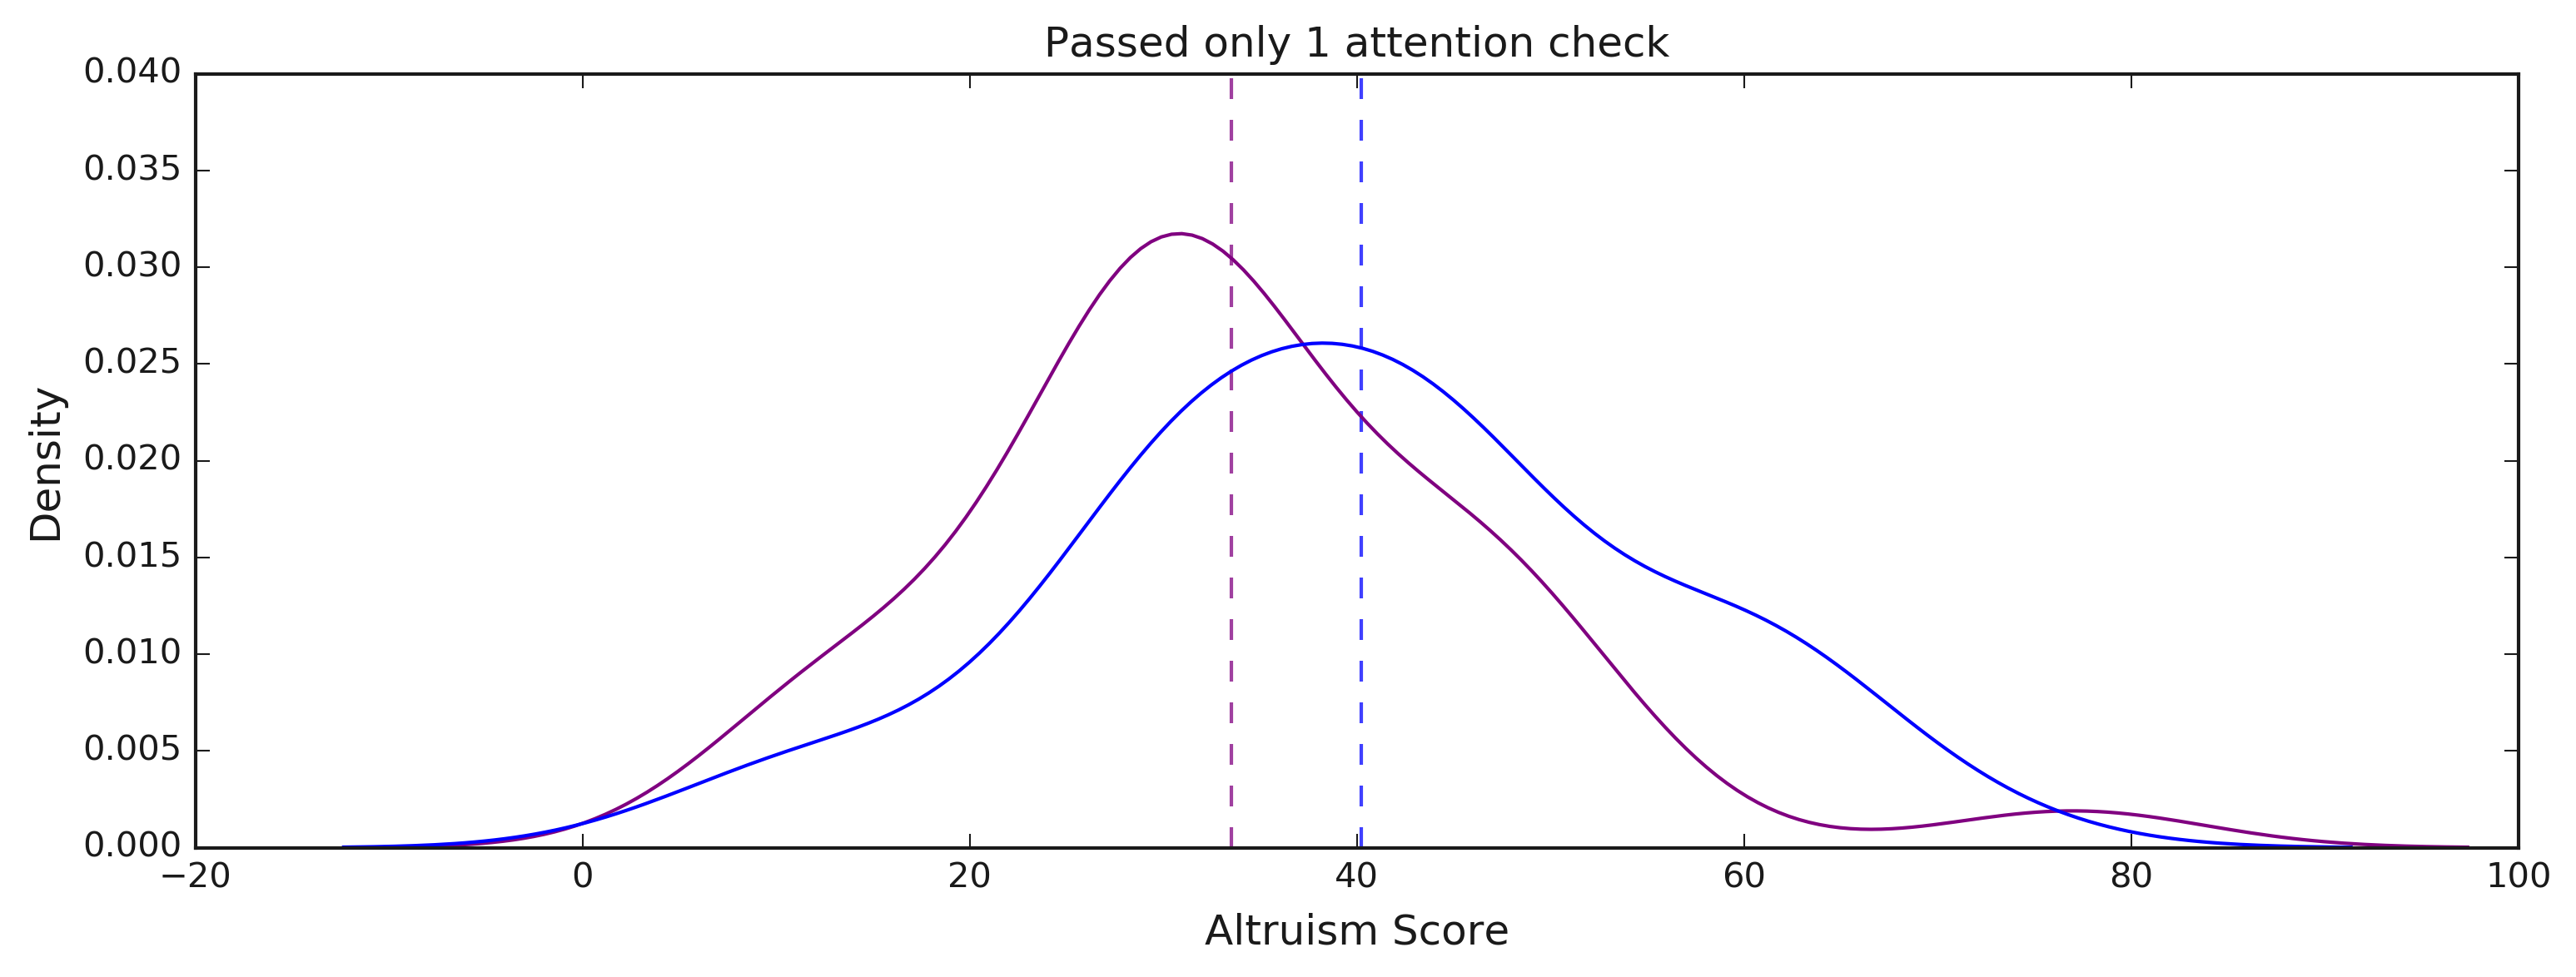

In [22]:
fig = plt.figure(figsize=(12,4), dpi=300)
for idx, i in enumerate(np.arange(-2,3)):
    if i in [-1,1]:
        sns.kdeplot(analysis_df[analysis_df['Treatment']==i][var], color=colors[idx], label=i);
        plt.vlines(analysis_df[analysis_df['Treatment']==i][var].mean(),0,.04, color=colors[idx], alpha=.75, linestyle='--');
plt.title("Passed only 1 attention check")
plt.xlabel("Altruism Score", size=12)
plt.ylabel("Density", size=12)
plt.show()

In [23]:
analysis_df[['Treatment', 'Al_Score']].groupby(['Treatment']).agg(['count', 'mean', 'var', 'std']).reset_index().rename(columns={"Al_Score": "Avg Altruism"})


Treatment Avg Altruism                      
                   count   mean     var    std
0 -2         76          37.092 148.725 12.195
1 -1         31          33.516 182.125 13.495
2  0         70          41.714 158.671 12.596
3  1         35          40.200 209.929 14.489
4  2         112         37.723 173.427 13.169

## Social Influence

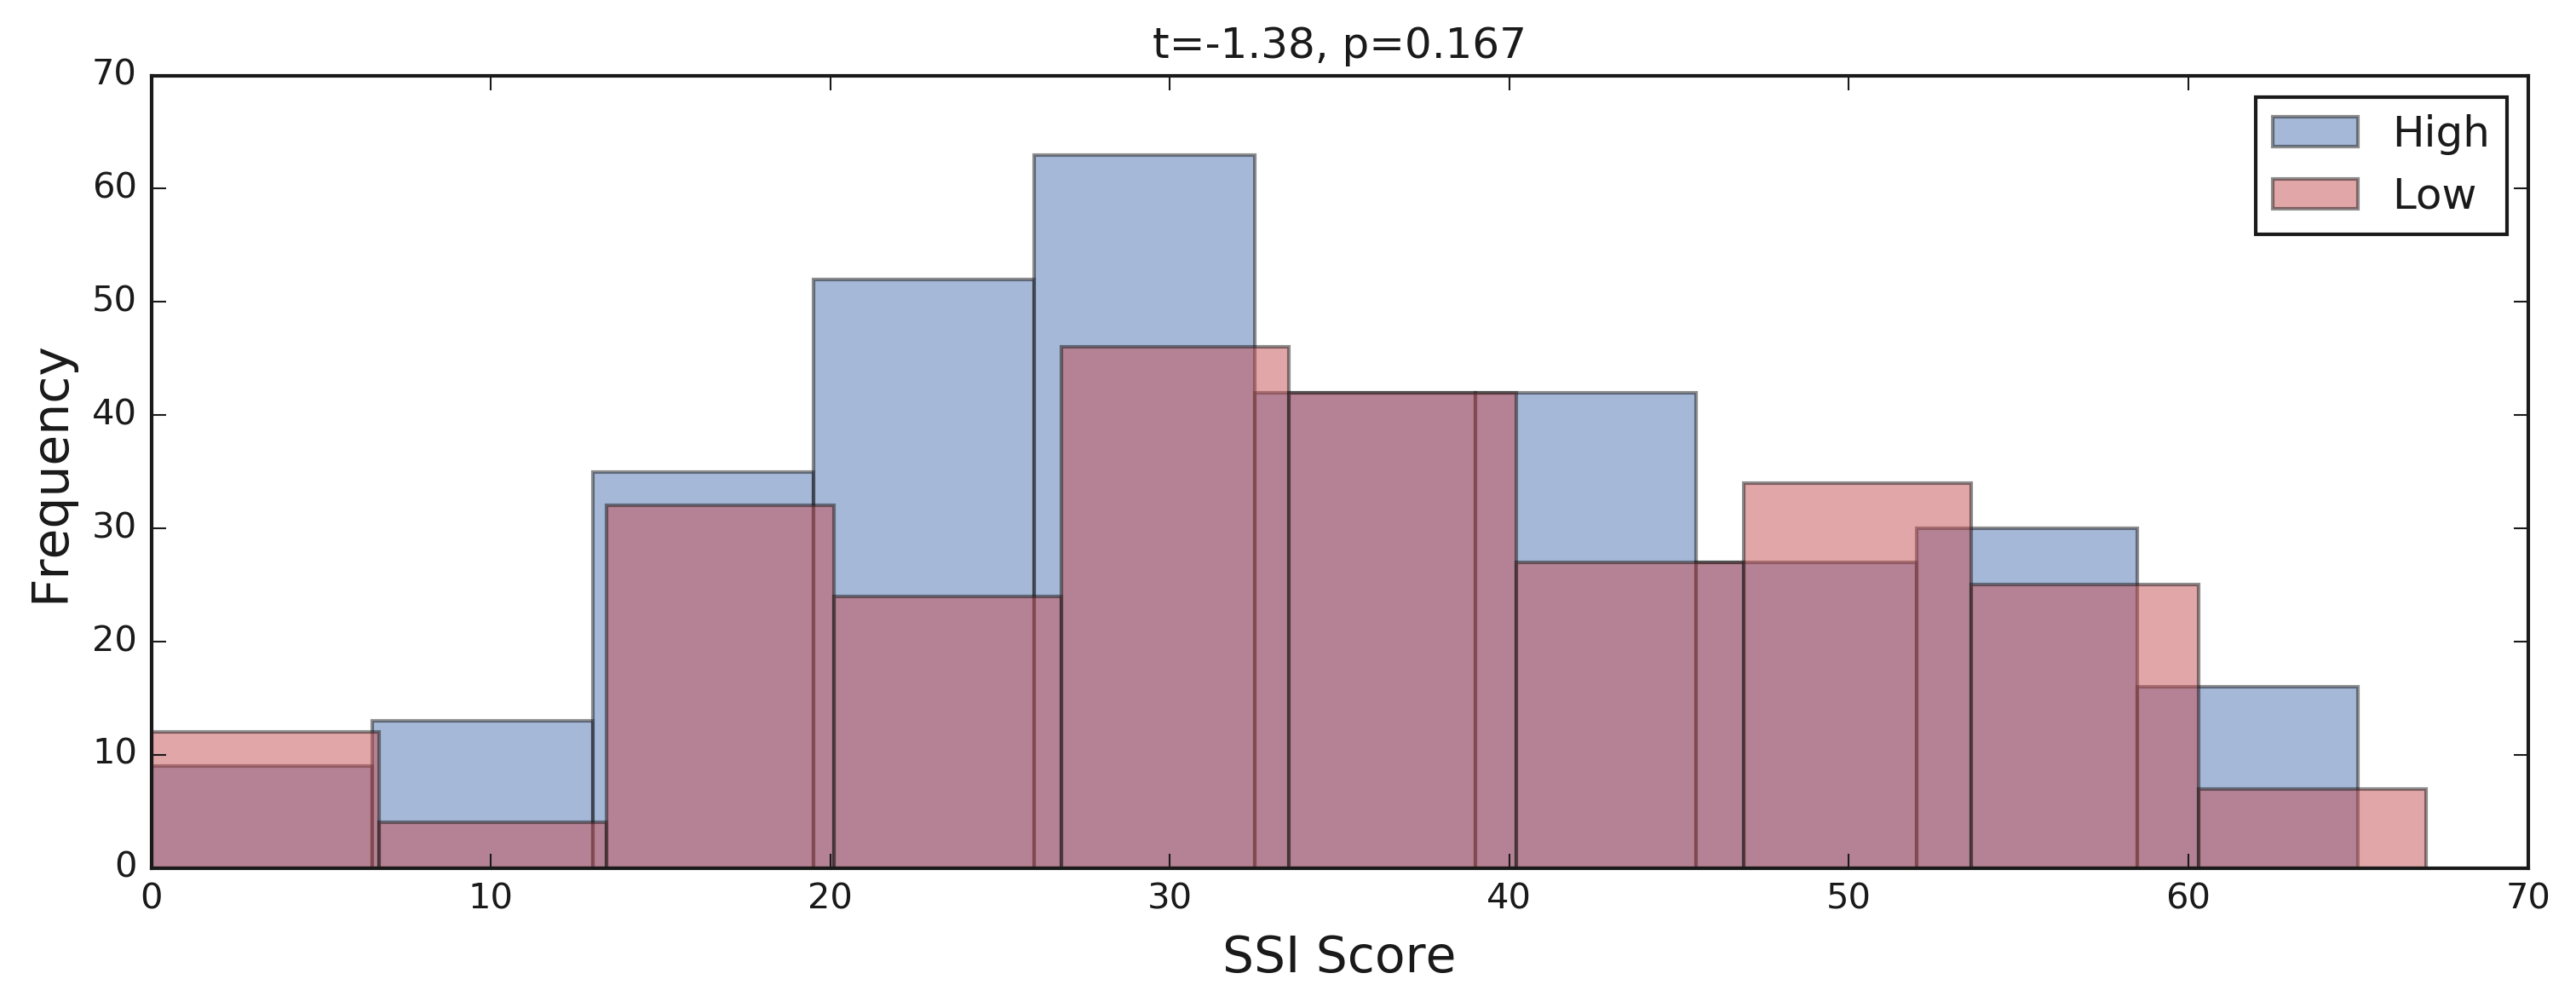

In [24]:
t, p_t = stats.ttest_ind(selection_df[selection_df['Treatment']=='H']['SSI'].values,
                        selection_df[selection_df['Treatment']=='L']['SSI'].values, 
                        equal_var = False)

fig = plt.figure(figsize=(12,4), dpi=300)
selection_df[selection_df['Treatment']=='H']['SSI'].plot(kind='hist', color='b', alpha=.5, label='High');
selection_df[selection_df['Treatment']=='L']['SSI'].plot(kind='hist', color='r', alpha=.5, label='Low');
plt.title(f"t={round(t,2)}, p={round(p_t,3)}")
plt.xlabel("SSI Score", size=14)
plt.ylabel("Frequency", size=14)
# plt.yscale('log')
plt.legend(loc='best')
plt.show()

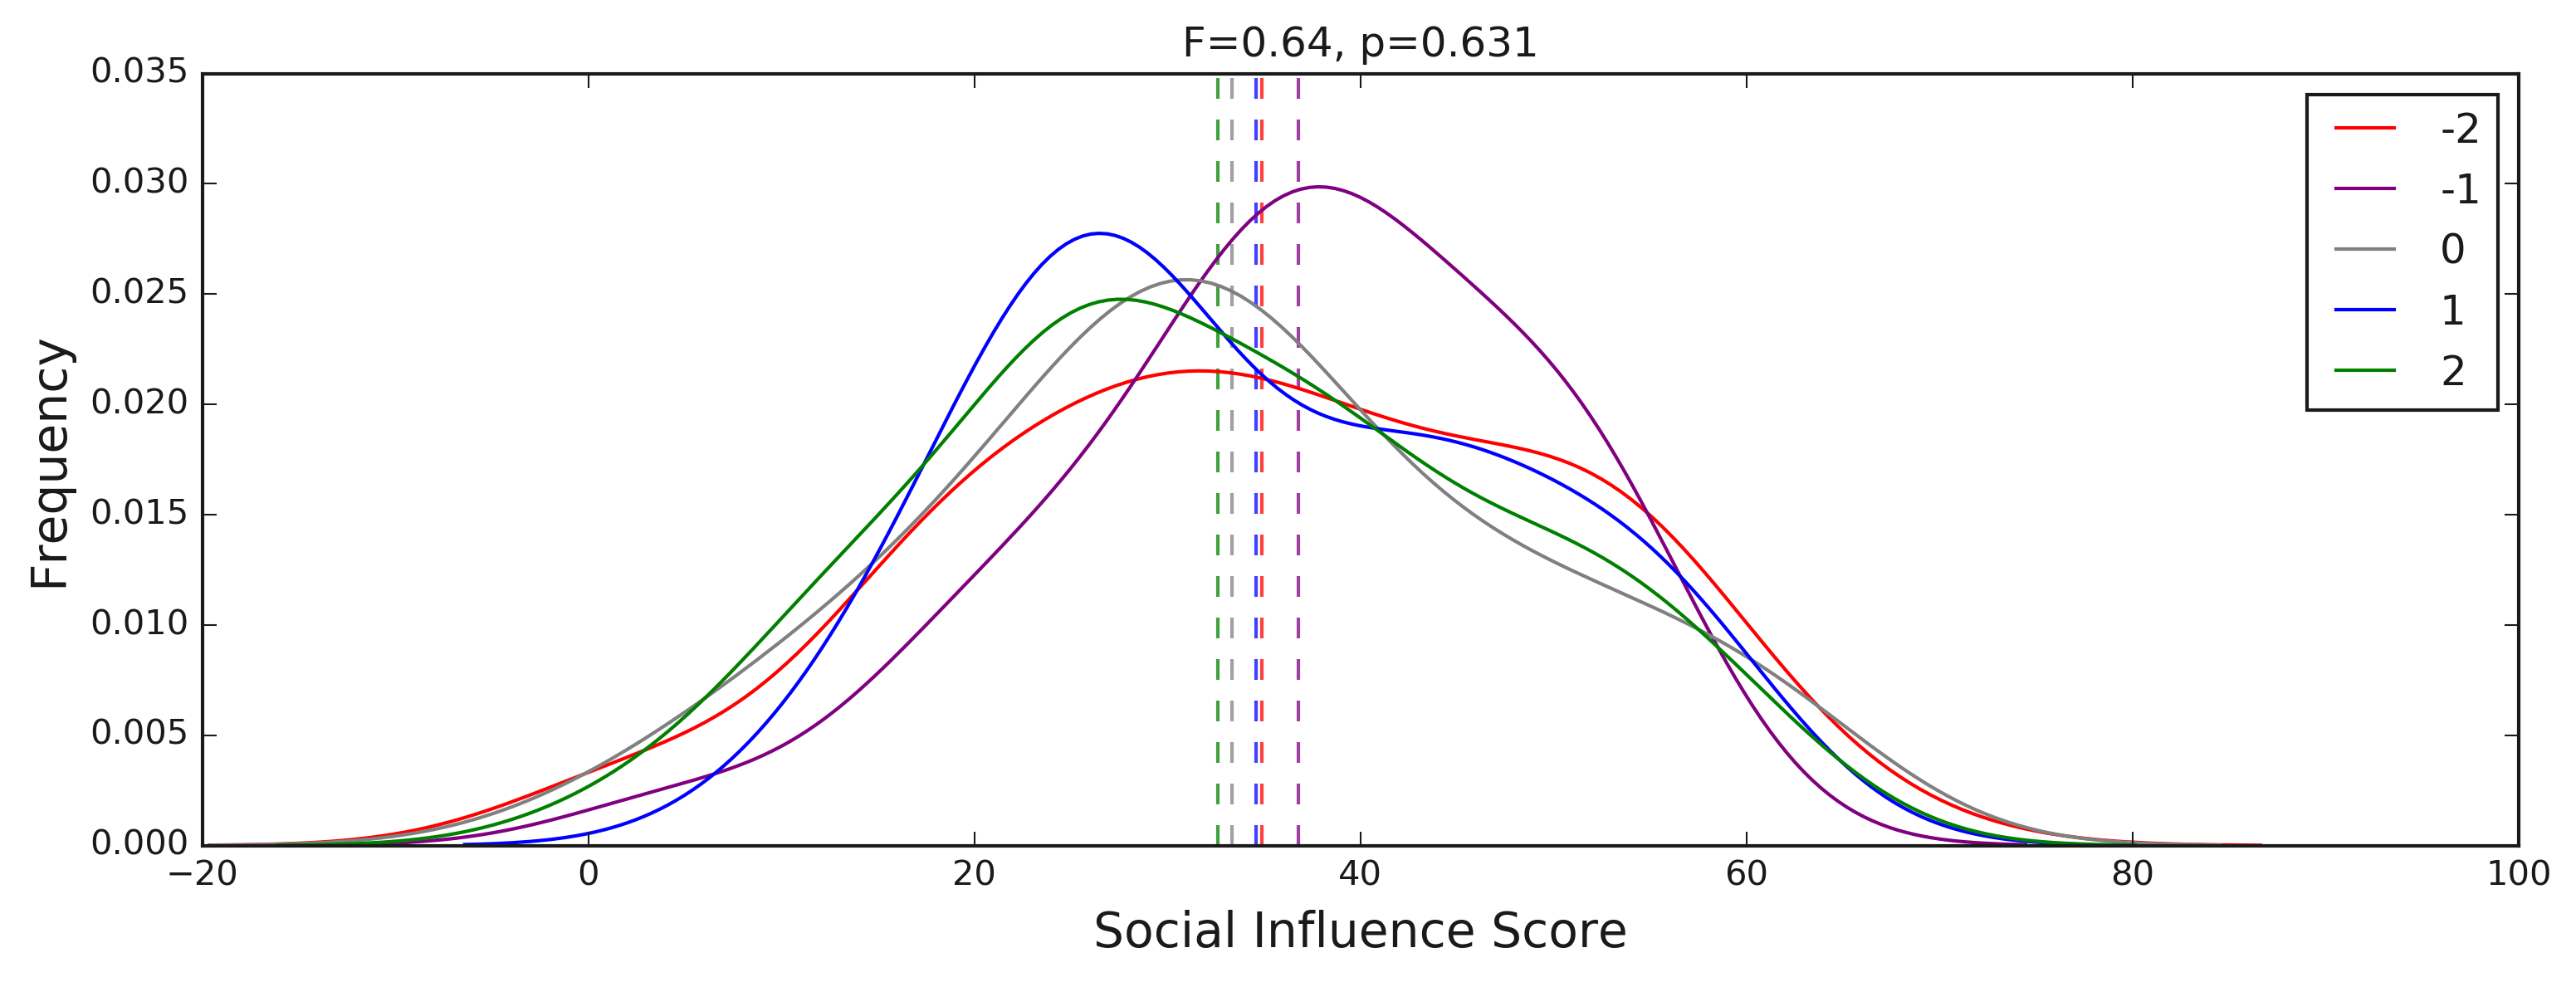

In [25]:
# SSI Score
ssi_columns = data.columns[143:161]
ssi_df = data[ssi_columns]

ssi_values = set(np.concatenate(data[ssi_columns].values))
ssi_values_map = {'Strongly disagree': 0, 
                  'Somewhat disagree': 1, 
                  'Neither agree nor disagree': 2,
                  'Somewhat agree': 3, 
                  'Strongly agree': 4}

ssi_df.replace(ssi_values_map, inplace=True)

var = 'SSI_Score'

ov_ssi = ssi_df.sum(axis=1)
ssi_df[var] = ov_ssi
analysis_df[var] = ov_ssi
data[var] = ov_ssi

F, p_a = stats.f_oneway(analysis_df[(analysis_df.Treatment==-2)][var].values,
                      analysis_df[(analysis_df.Treatment==-1)][var].values,
                      analysis_df[(analysis_df.Treatment==0)][var].values,
                      analysis_df[(analysis_df.Treatment==1)][var].values,
                      analysis_df[(analysis_df.Treatment==2)][var].values)

fig = plt.figure(figsize=(12,4), dpi=300)
for idx, i in enumerate(np.arange(-2,3)):
    sns.kdeplot(analysis_df[analysis_df['Treatment']==i][var], color=colors[idx], label=i);
    plt.vlines(analysis_df[analysis_df['Treatment']==i][var].mean(),0,.035, color=colors[idx], alpha=.75, linestyle='--')
plt.xlabel("Social Influence Score", size=14)
plt.ylabel("Frequency", size=14)
plt.title(f"F={round(F,2)}, p={round(p_a,3)}")
plt.legend();



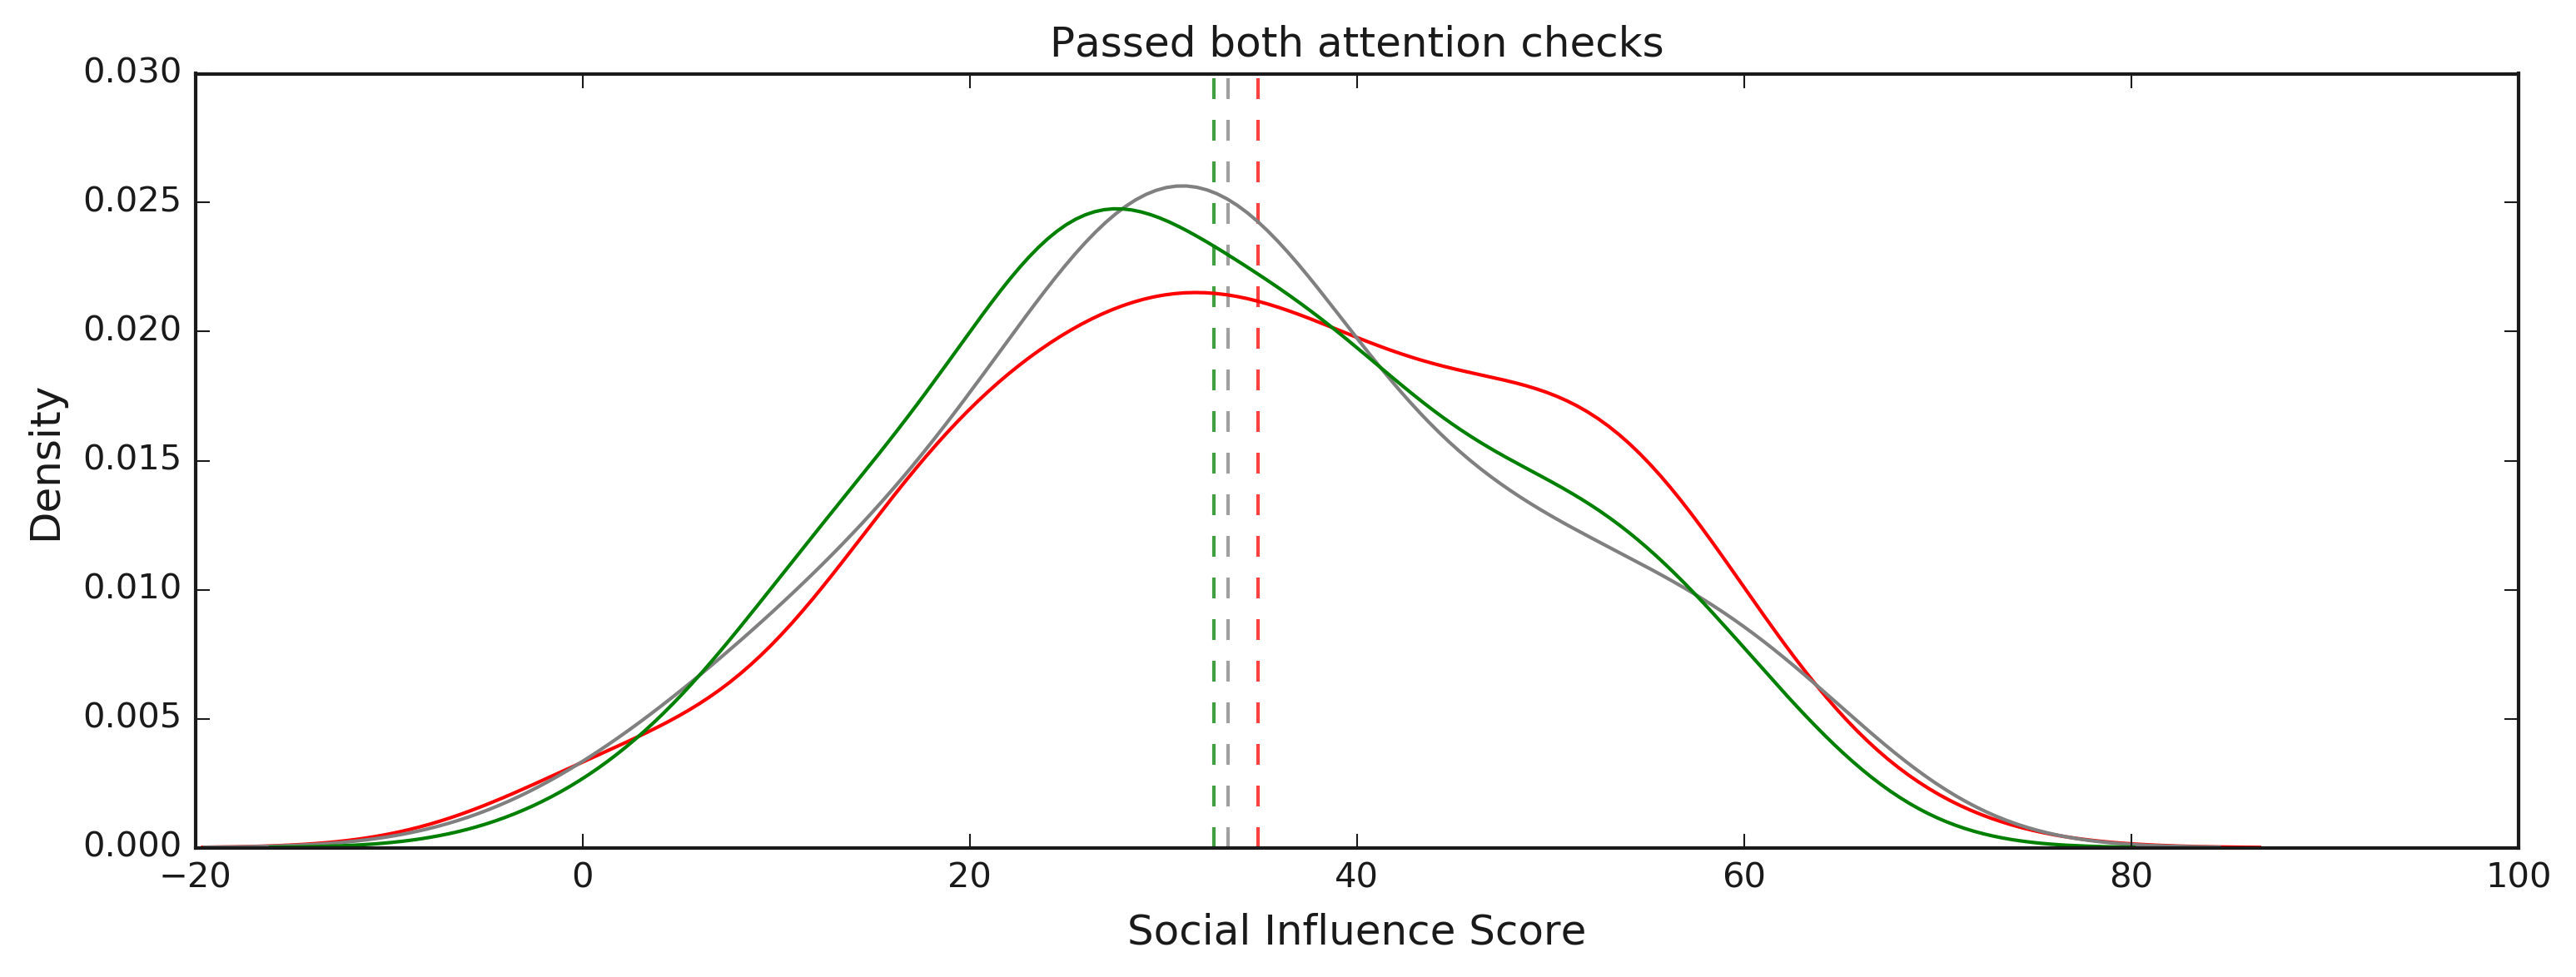

In [26]:
fig = plt.figure(figsize=(12,4), dpi=300)
for idx, i in enumerate(np.arange(-2,3)):
    if i in [-2,0,2]:
        sns.kdeplot(analysis_df[analysis_df['Treatment']==i][var], color=colors[idx], label=i);
        plt.vlines(analysis_df[analysis_df['Treatment']==i][var].mean(),0,.03, color=colors[idx], alpha=.75, linestyle='--');
plt.title("Passed both attention checks")
plt.xlabel("Social Influence Score", size=12)
plt.ylabel("Density", size=12)
plt.show()

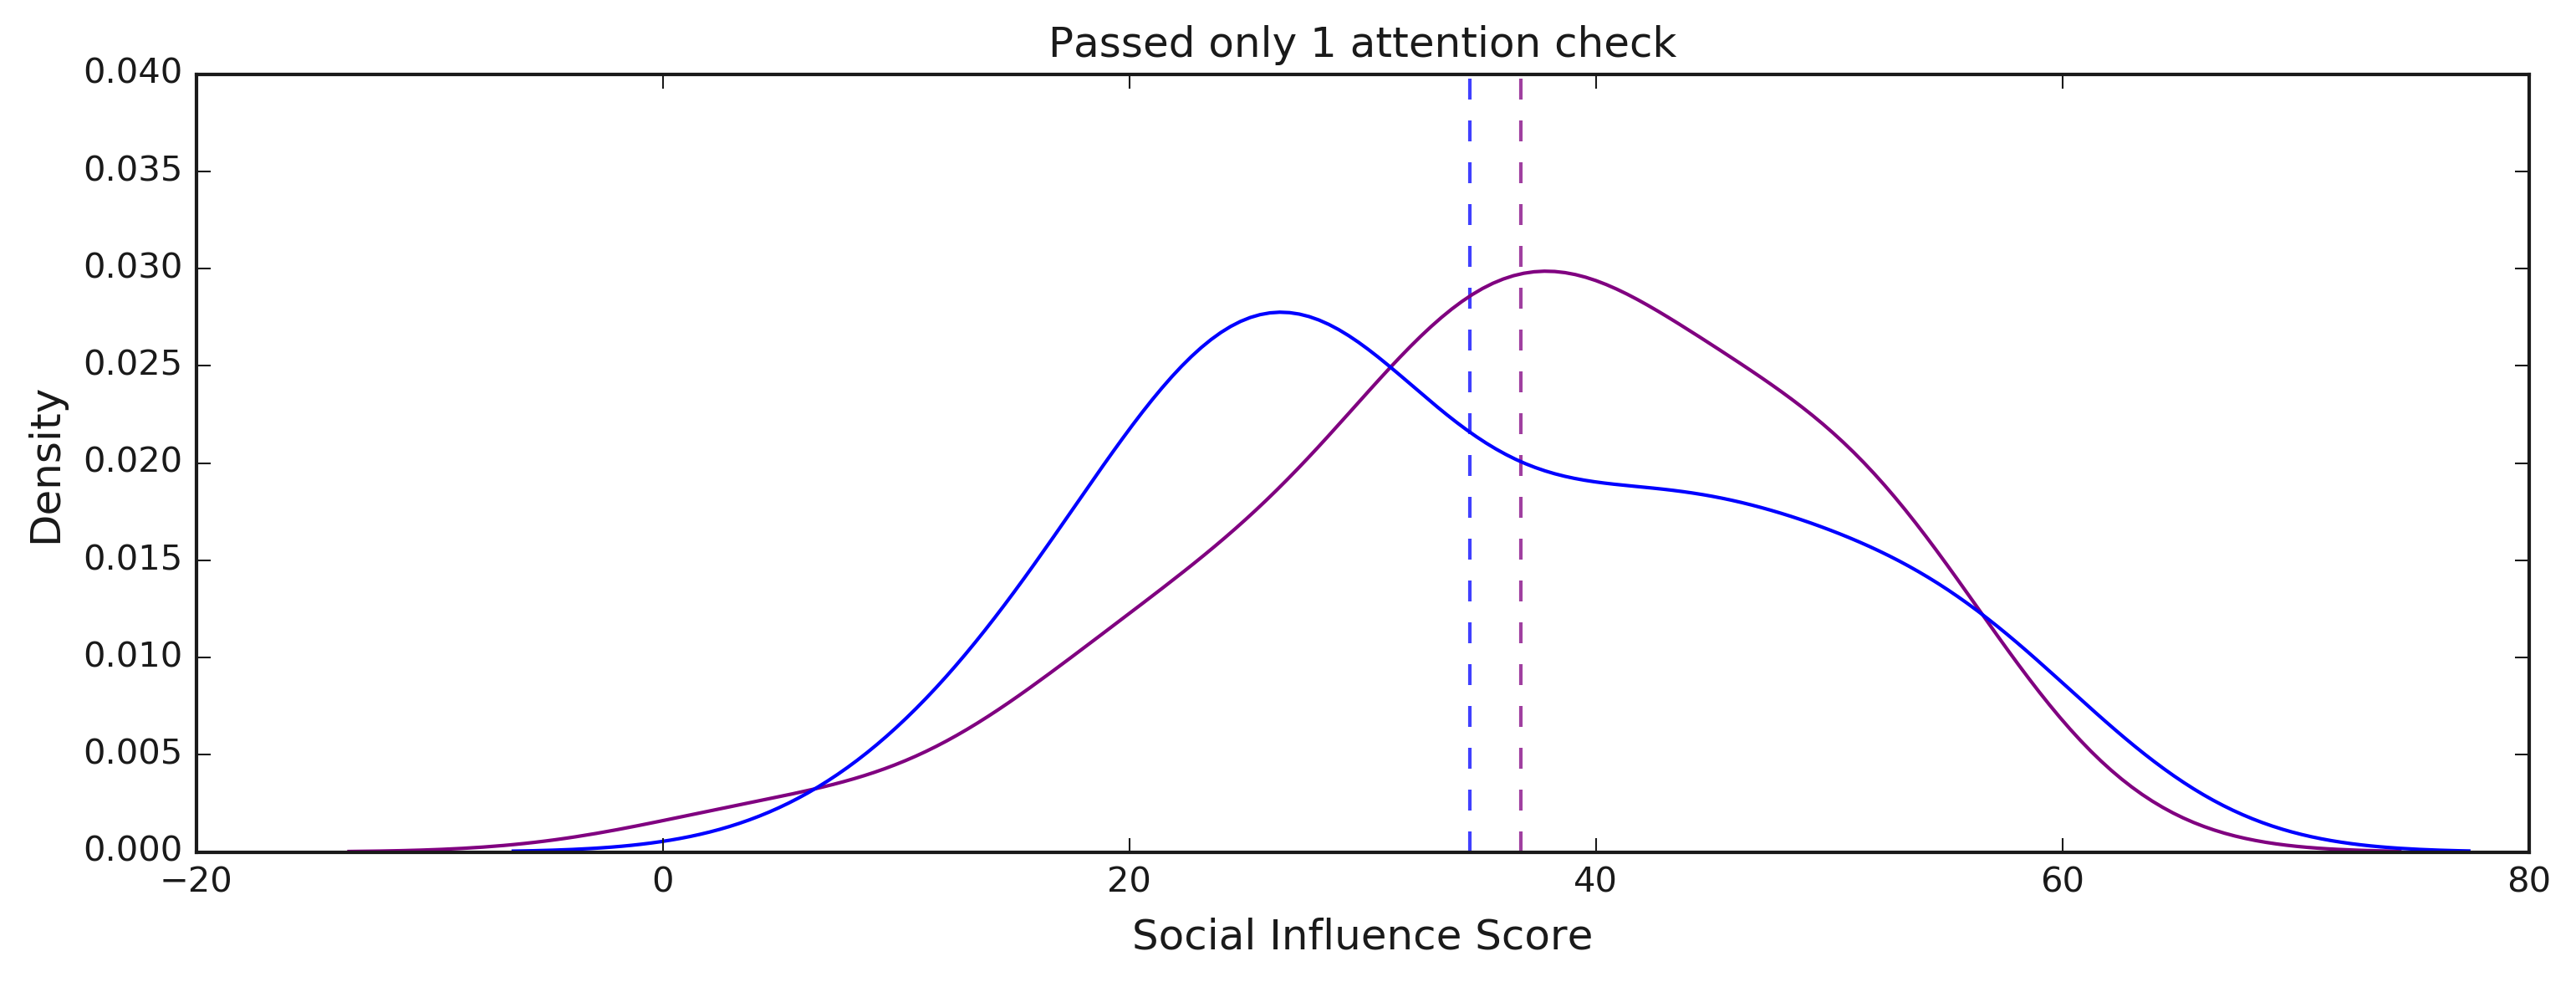

In [27]:
fig = plt.figure(figsize=(12,4), dpi=300)
for idx, i in enumerate(np.arange(-2,3)):
    if i in [-1,1]:
        sns.kdeplot(analysis_df[analysis_df['Treatment']==i][var], color=colors[idx], label=i);
        plt.vlines(analysis_df[analysis_df['Treatment']==i][var].mean(),0,.04, color=colors[idx], alpha=.75, linestyle='--');
plt.title("Passed only 1 attention check")
plt.xlabel("Social Influence Score", size=12)
plt.ylabel("Density", size=12)
plt.show()

In [28]:
analysis_df[['Treatment', 'SSI_Score']].groupby(['Treatment']).agg('mean').reset_index().rename(columns={"SSI_Score": "Avg SSI"})


,Treatment,Avg SSI
0,-2,34.908
1,-1,36.774
2,0,33.357
3,1,34.600
4,2,32.625


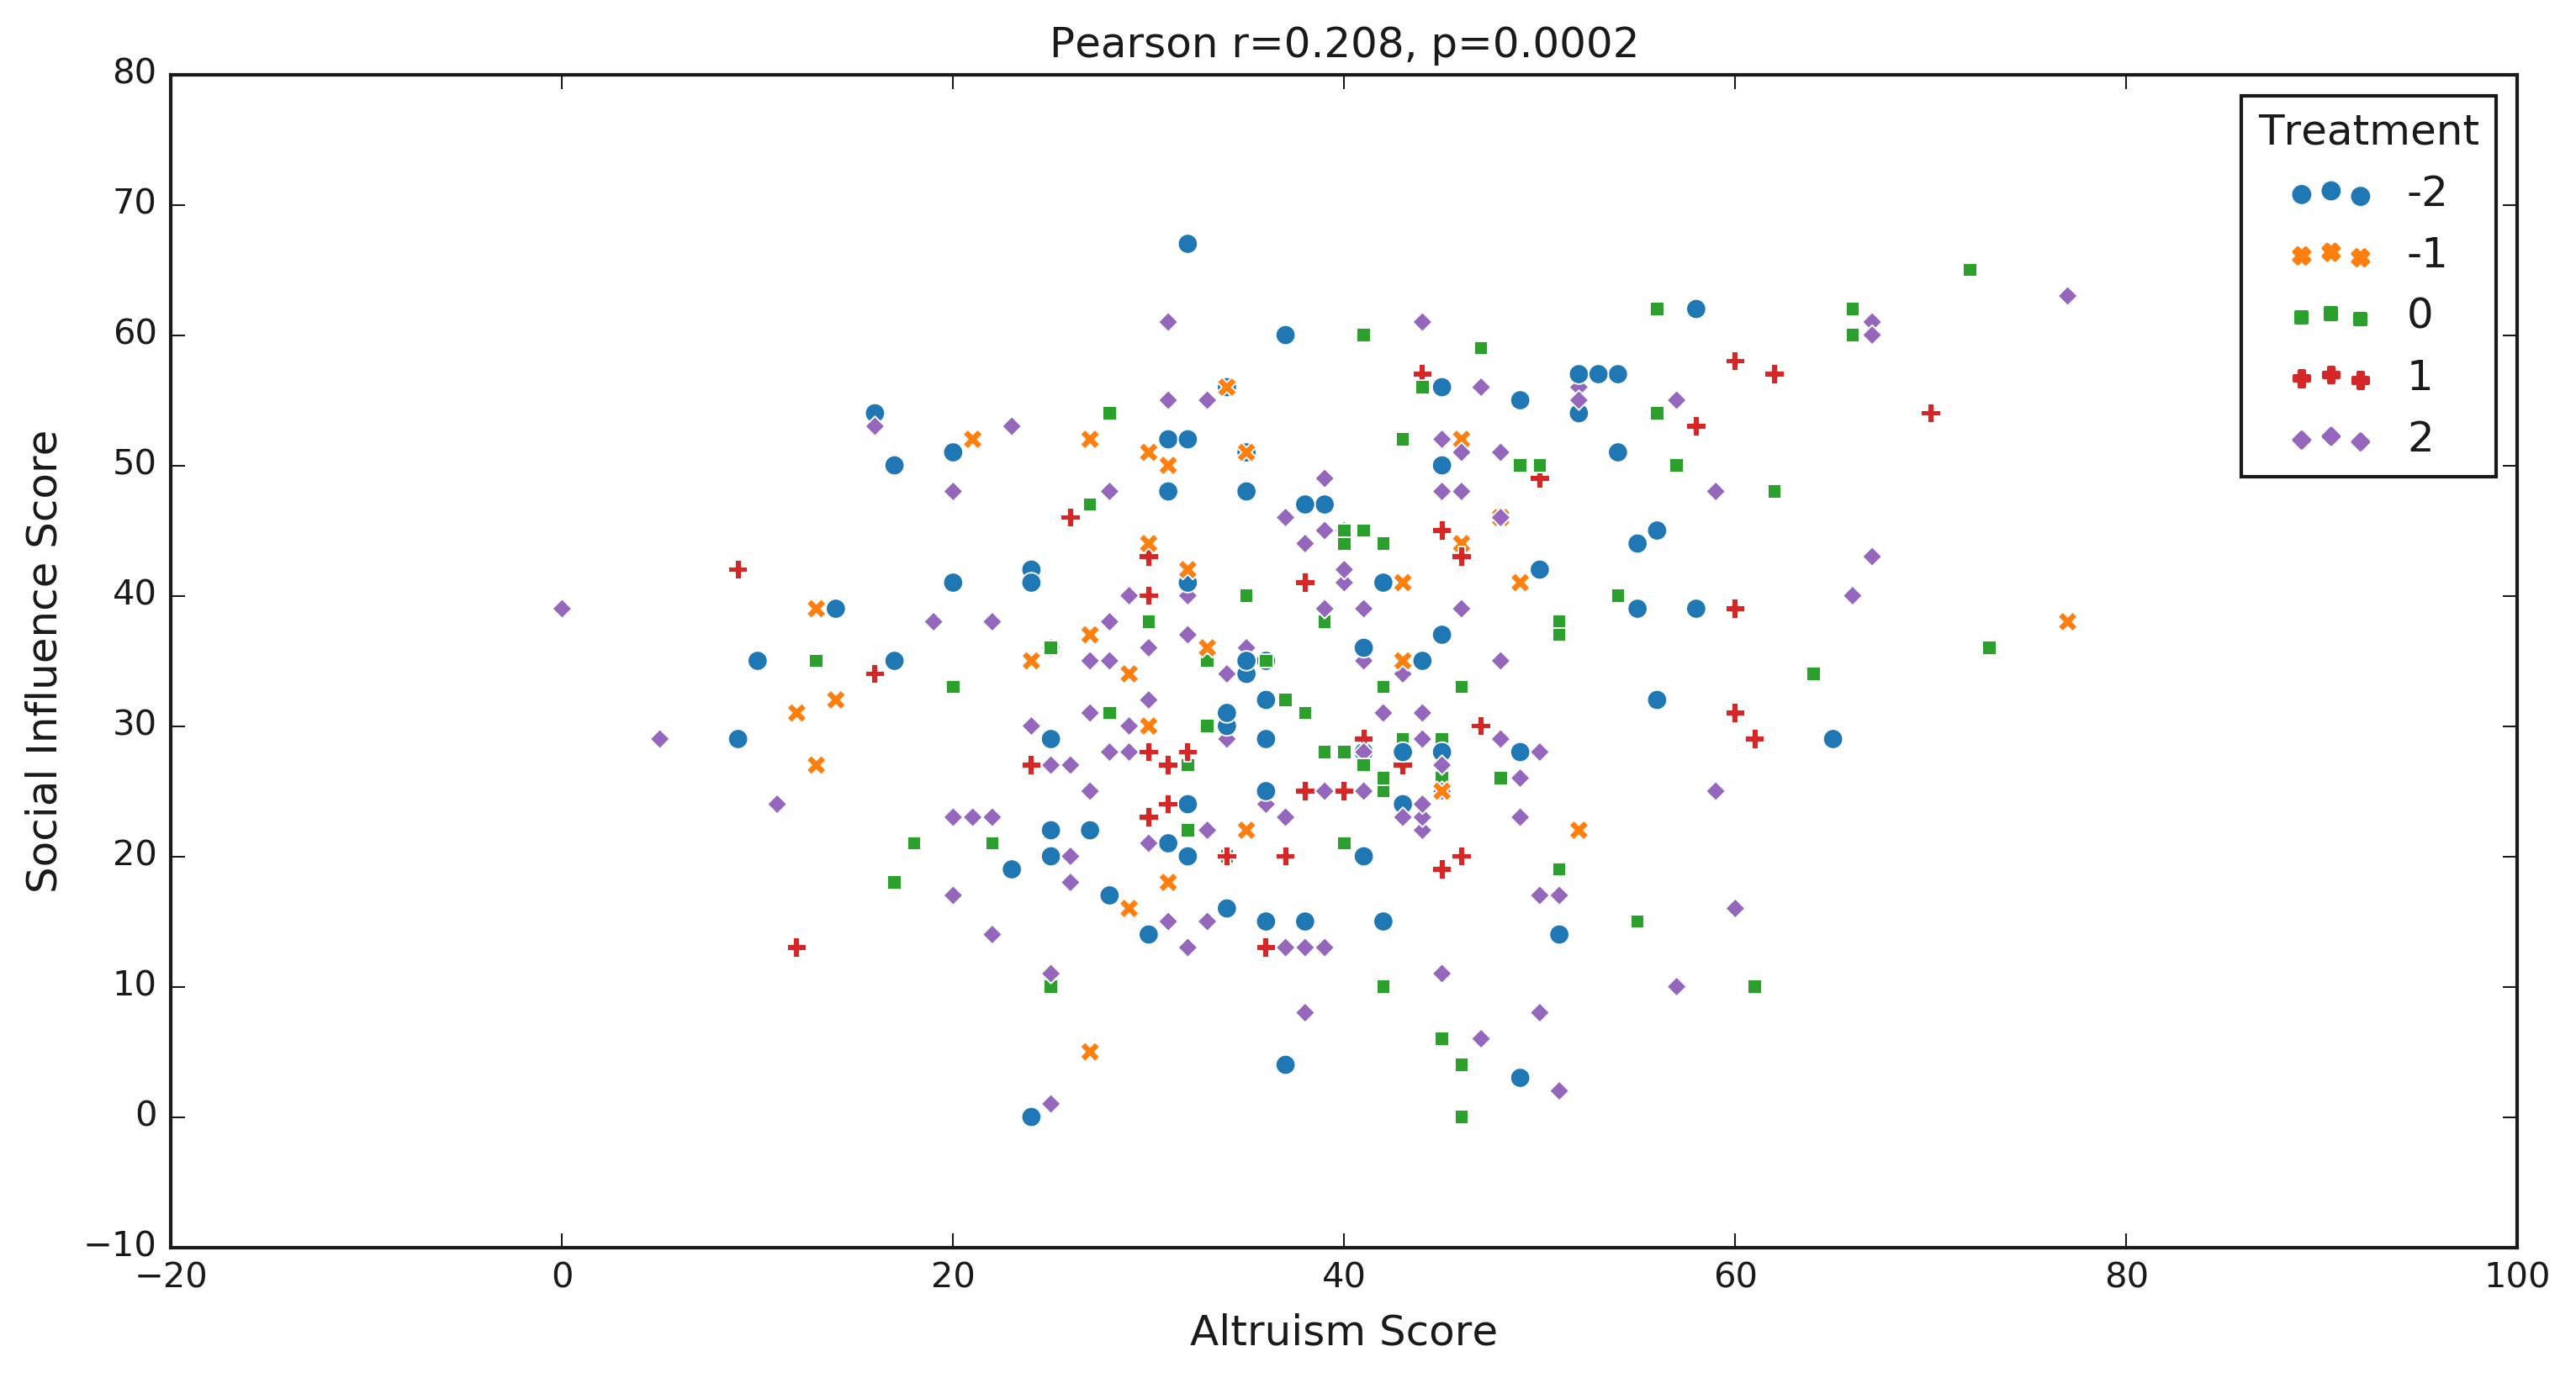

In [29]:
fig = plt.figure(figsize=(12,6), dpi=300)
sns.scatterplot(data = analysis_df[['Treatment', 'Al_Score', 'SSI_Score']], 
                x='Al_Score', y='SSI_Score', s=32, palette='tab10', 
                style='Treatment', hue='Treatment')
corr = stats.pearsonr(analysis_df['Al_Score'], analysis_df['SSI_Score'])
plt.title(f"Pearson r={round(corr[0],3)}, p={round(corr[1],4)}")
plt.xlabel("Altruism Score", size=12)
plt.ylabel("Social Influence Score", size=12)
plt.show()

In [30]:
analysis_df[['Al_Score', 'SSI_Score']].corr()

,Al_Score,SSI_Score
Al_Score,1.000,0.208
SSI_Score,0.208,1.000


In [31]:
def serial_copy(arr):
    out_arr = []
    for value in arr:
        out_arr.append(value)
        out_arr.append(value)
    return out_arr

def counter_factual(arr):
    out_arr = []
    for value in arr:
        out_arr.append(value)
        if value == 'H':
            out_arr.append('L')
        elif value == 'L':
            out_arr.append('H')
    return out_arr

In [32]:
outcome_df = pd.DataFrame()
for column in selection_df.columns[:-1]:
    outcome_df[column] = serial_copy(selection_df[column])
outcome_df['Treatment'] = counter_factual(selection_df['Treatment'])
outcome_df['Outcome'] = [1,0]*len(selection_df)
outcome_df['Category'].replace(category_map, inplace=True)
outcome_df['Treatment'].replace(condition_map, inplace=True)
outcome_df.to_csv('selections.csv', index=False)

In [33]:
outcome_df.head(10)

,Category,Gender,Age,Employment,Education,Income,Race,Interest,SSI,Altruism,Treatment,Outcome
0,3,1,1,4,4,3,2,3,4,37,0,1
1,3,1,1,4,4,3,2,3,4,37,1,0
2,1,1,1,4,4,3,2,2,4,37,0,1
3,1,1,1,4,4,3,2,2,4,37,1,0
4,1,1,0,4,4,3,2,2,29,65,0,1
5,1,1,0,4,4,3,2,2,29,65,1,0
6,3,1,0,4,4,3,2,3,29,65,0,1
7,3,1,0,4,4,3,2,3,29,65,1,0
8,1,2,0,3,1,0,1,3,46,37,1,1
9,1,2,0,3,1,0,1,3,46,37,0,0


In [34]:
analysis_df.to_csv('participants_a.csv', index=False)

In [35]:
analysis_df.head()

,ID,Gender,Age,Employment,Education,Income,Race,Treatment,Al_Score,SSI_Score
2,72824,Male,30-49 years,Employed Full-Time,Bachelor’s degree,"$50,000-$74,999",White,-2,37,4
3,94616,Male,19-29 years,Employed Full-Time,Bachelor’s degree,"$50,000-$74,999",White,-2,65,29
5,89576,Female,19-29 years,Employed Part-Time,High school graduate,"Less than $15,000",Asian,2,37,46
8,98724,Female,30-49 years,Employed Full-Time,Some college,"$30,000-$49,999",White,-2,24,0
9,51615,Male,19-29 years,Employed Full-Time,Bachelor’s degree,"$50,000-$74,999",Asian,-2,31,52
